## Understanding Data

In [9]:
import pandas as pd

#train_err = pd.read_csv('./data/train_err_data.csv')
#train_qual = pd.read_csv('./data/train_quality_data.csv')
train_prob = pd.read_csv('./data/train_problem_data.csv')

In [335]:
train_err.shape, train_qual.shape, train_prob.shape

((16554663, 6), (828624, 16), (5429, 2))

train_qual에서 quality 3와 4는 모두 0의 값을 가지기 때문에 삭제, 나머지 열은 data type을 모두 숫자형으로 바꿔준다.

In [336]:
train_qual_num = train_qual_num = train_qual[['quality_' + str(i) for i in range(13)]]

del train_qual_num['quality_3']
del train_qual_num['quality_4']

obj_col = ['quality_5', 'quality_7', 'quality_8', 'quality_9', 'quality_10']
num_col = ['quality_0', 'quality_1', 'quality_2', 'quality_6', 'quality_11', 'quality_12']

for col in obj_col:
    train_qual_num[col] = train_qual_num[col].astype(str).str.replace(',', '').astype(float)
    
new_train_qual = train_qual[['user_id', 'fwver', 'time']].join(train_qual_num)
new_train_qual.head()

,user_id,fwver,time,quality_0,quality_1,quality_2,quality_5,quality_6,quality_7,quality_8,quality_9,quality_10,quality_11,quality_12
0,10000,05.15.2138,20201129090000,0.0,0,0.0,0.0,0,0.0,0.0,0.0,4.0,0,0
1,10000,05.15.2138,20201129090000,0.0,0,0.0,0.0,0,0.0,0.0,0.0,4.0,0,0
2,10000,05.15.2138,20201129090000,0.0,0,0.0,0.0,0,0.0,0.0,0.0,4.0,0,0
3,10000,05.15.2138,20201129090000,0.0,0,0.0,0.0,0,0.0,0.0,0.0,4.0,0,0
4,10000,05.15.2138,20201129090000,0.0,0,0.0,0.0,0,0.0,0.0,0.0,4.0,0,0


In [28]:
#qual_col = ['quality_' + str(i) for i in range(3)] + ['quality_' + str(i) for i in range(5, 13)]

#nnew_train_qual = new_train_qual.drop_duplicates(subset=['user_id', 'fwver'] + qual_col)

## Numeric features - train_qual

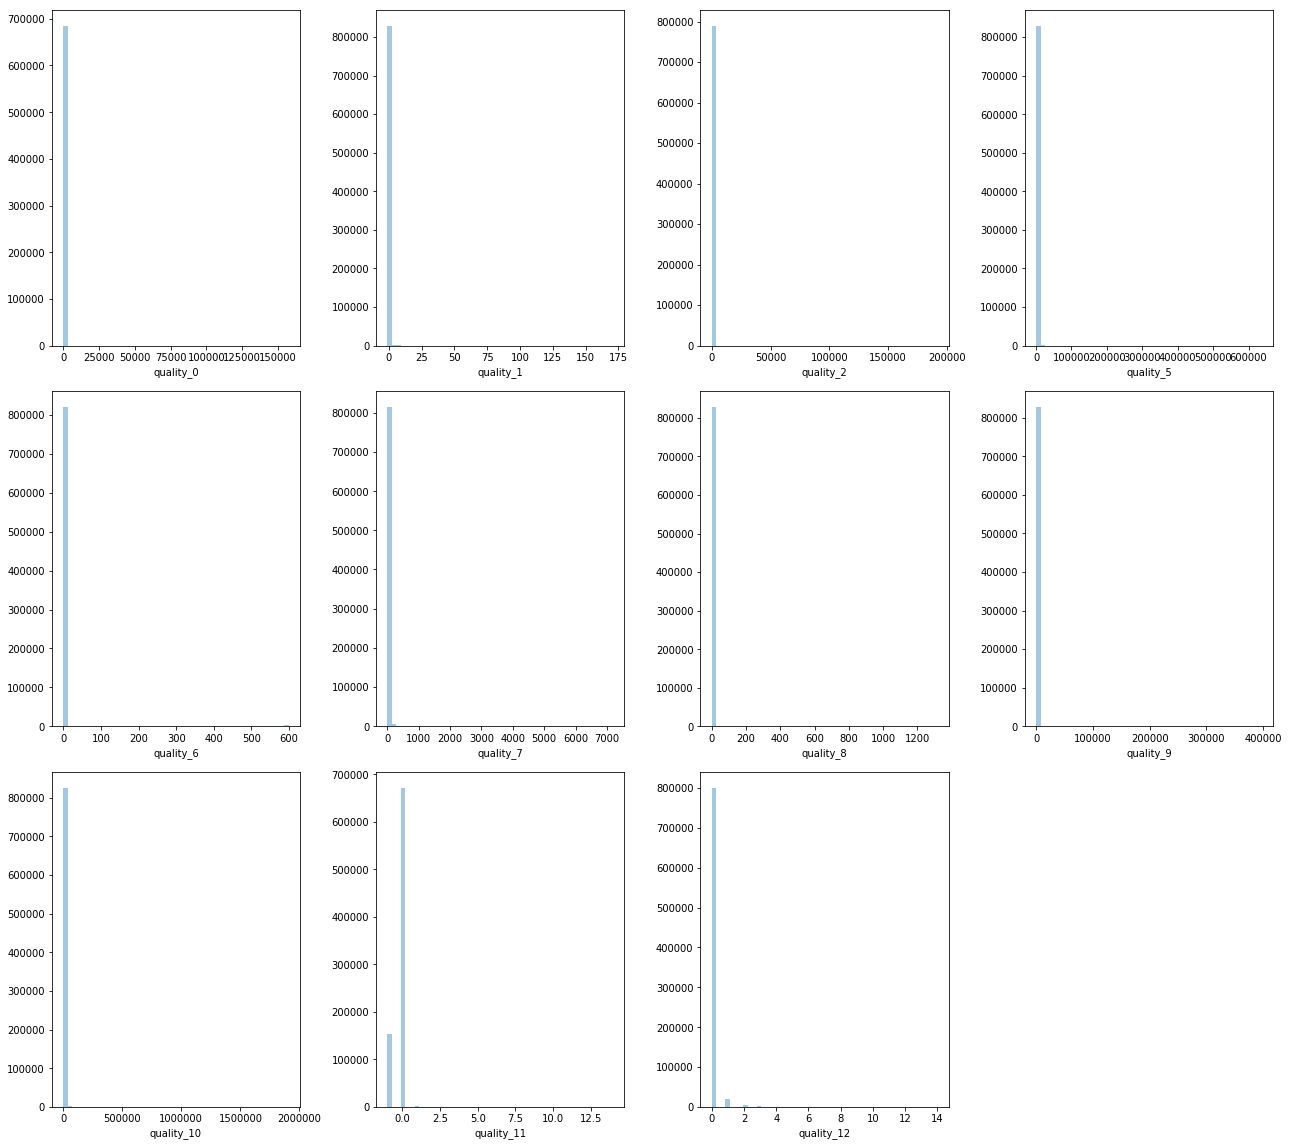

In [337]:
import seaborn as sns
import matplotlib.pyplot as plt

num_col = ['quality_' + str(i) for i in range(3)] + ['quality_' + str(i) for i in range(5, 13)]
qual_ = new_train_qual[num_col].copy()

fig = plt.figure(figsize=(18,16))
for index,col in enumerate(num_col):
    plt.subplot(3,4,index+1)
    sns.distplot(qual_.loc[:,col].dropna(), kde=False)
fig.tight_layout(pad=1.0)

In [338]:
import numpy as np

new_train_qual['quality_11'].value_counts() / np.float(len(new_train_qual))

 0     0.811259
-1     0.185462
 1     0.002930
 2     0.000245
 3     0.000060
 4     0.000023
 5     0.000010
 6     0.000006
 14    0.000001
 9     0.000001
 8     0.000001
 7     0.000001
Name: quality_11, dtype: float64

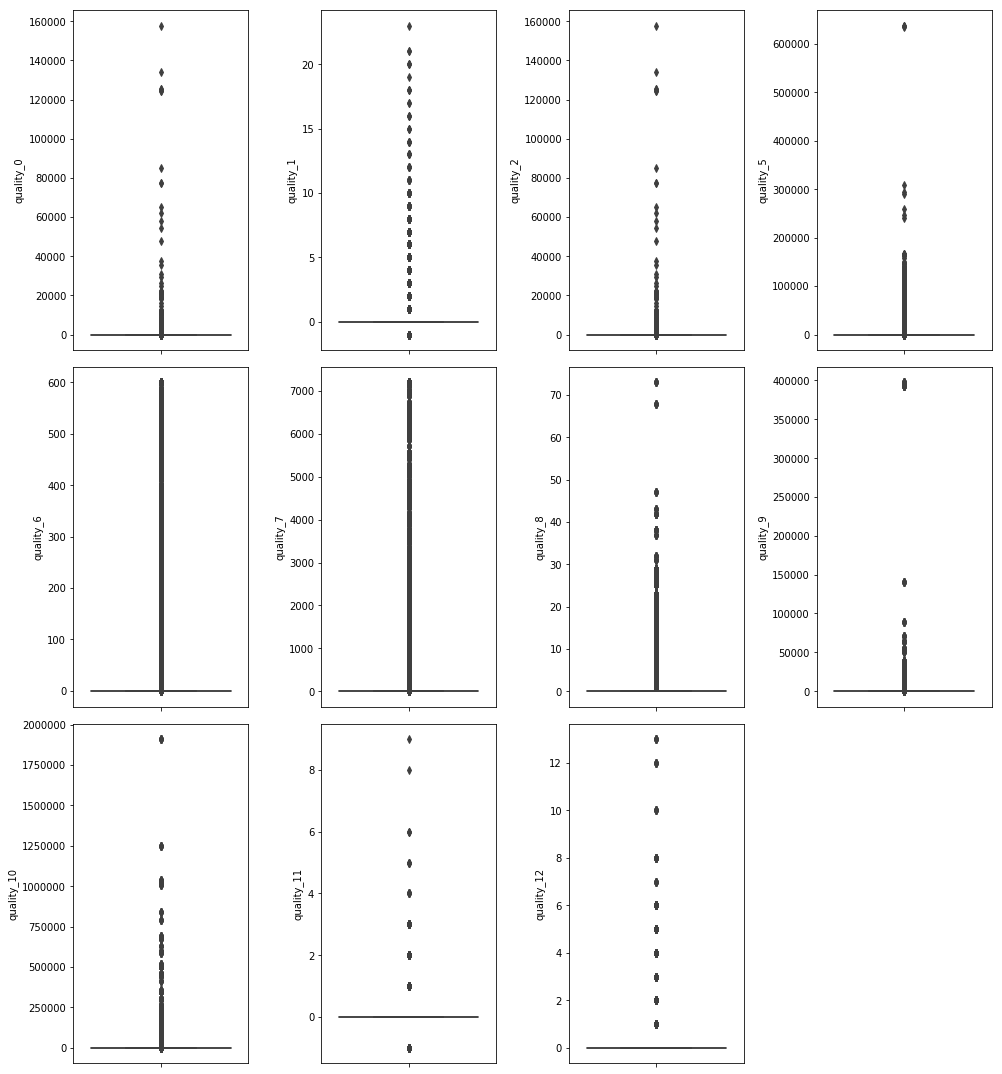

In [339]:
fig = plt.figure(figsize=(14,15))
for index,col in enumerate(num_col):
    plt.subplot(3,4,index+1)
    sns.boxplot(y=col, data=qual_.dropna())
fig.tight_layout(pad=1.0)

# Correlation Matrix - train_qual

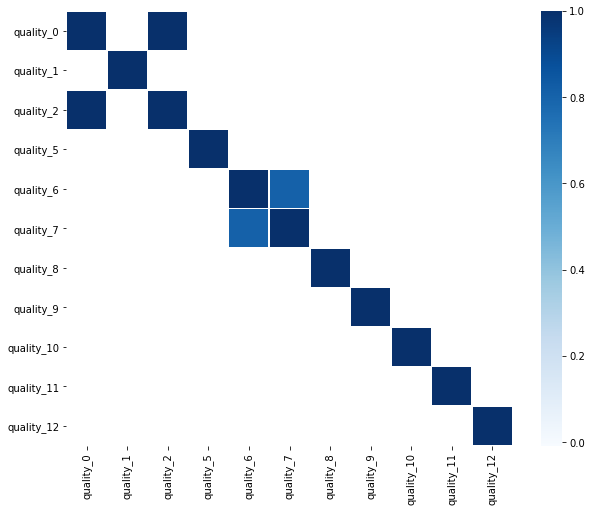

In [340]:
plt.figure(figsize=(10,8))
correlation = qual_.corr()
sns.heatmap(correlation, mask = correlation <0.8, linewidth=0.5, cmap='Blues')

## Identifying relationship between Numerical Predictor and Target

In [341]:
new_train_prob = train_prob.sort_values(by='time').drop_duplicates(subset='user_id')
new_train_prob = new_train_prob.sort_values(by='user_id')
new_train_prob.head()

,user_id,time
1116,10001,20201113190000
492,10004,20201104120000
3857,10005,20201113120000
414,10006,20201110170000
4243,10008,20201124130000


In [342]:
new_train_qual.head()

,user_id,fwver,time,quality_0,quality_1,quality_2,quality_5,quality_6,quality_7,quality_8,quality_9,quality_10,quality_11,quality_12
0,10000,05.15.2138,20201129090000,0.0,0,0.0,0.0,0,0.0,0.0,0.0,4.0,0,0
1,10000,05.15.2138,20201129090000,0.0,0,0.0,0.0,0,0.0,0.0,0.0,4.0,0,0
2,10000,05.15.2138,20201129090000,0.0,0,0.0,0.0,0,0.0,0.0,0.0,4.0,0,0
3,10000,05.15.2138,20201129090000,0.0,0,0.0,0.0,0,0.0,0.0,0.0,4.0,0,0
4,10000,05.15.2138,20201129090000,0.0,0,0.0,0.0,0,0.0,0.0,0.0,4.0,0,0


In [343]:
nnew_train_qual = new_train_qual.copy()
nnew_train_qual['DateTime'] = pd.to_datetime(nnew_train_qual['time'].astype(str), format='%Y%m%d%H%M%S')
del nnew_train_qual['time']
nnew_train_qual.head()

,user_id,fwver,quality_0,quality_1,quality_2,quality_5,quality_6,quality_7,quality_8,quality_9,quality_10,quality_11,quality_12,DateTime
0,10000,05.15.2138,0.0,0,0.0,0.0,0,0.0,0.0,0.0,4.0,0,0,2020-11-29 09:00:00
1,10000,05.15.2138,0.0,0,0.0,0.0,0,0.0,0.0,0.0,4.0,0,0,2020-11-29 09:00:00
2,10000,05.15.2138,0.0,0,0.0,0.0,0,0.0,0.0,0.0,4.0,0,0,2020-11-29 09:00:00
3,10000,05.15.2138,0.0,0,0.0,0.0,0,0.0,0.0,0.0,4.0,0,0,2020-11-29 09:00:00
4,10000,05.15.2138,0.0,0,0.0,0.0,0,0.0,0.0,0.0,4.0,0,0,2020-11-29 09:00:00


In [344]:
nnew_train_prob = new_train_prob.copy()
nnew_train_prob['DateTime'] = pd.to_datetime(nnew_train_prob['time'].astype(str), format='%Y%m%d%H%M%S')
del nnew_train_prob['time']
nnew_train_prob.head()

,user_id,DateTime
1116,10001,2020-11-13 19:00:00
492,10004,2020-11-04 12:00:00
3857,10005,2020-11-13 12:00:00
414,10006,2020-11-10 17:00:00
4243,10008,2020-11-24 13:00:00


In [345]:
nnew_train_qual.head()

,user_id,fwver,quality_0,quality_1,quality_2,quality_5,quality_6,quality_7,quality_8,quality_9,quality_10,quality_11,quality_12,DateTime
0,10000,05.15.2138,0.0,0,0.0,0.0,0,0.0,0.0,0.0,4.0,0,0,2020-11-29 09:00:00
1,10000,05.15.2138,0.0,0,0.0,0.0,0,0.0,0.0,0.0,4.0,0,0,2020-11-29 09:00:00
2,10000,05.15.2138,0.0,0,0.0,0.0,0,0.0,0.0,0.0,4.0,0,0,2020-11-29 09:00:00
3,10000,05.15.2138,0.0,0,0.0,0.0,0,0.0,0.0,0.0,4.0,0,0,2020-11-29 09:00:00
4,10000,05.15.2138,0.0,0,0.0,0.0,0,0.0,0.0,0.0,4.0,0,0,2020-11-29 09:00:00


In [346]:
train_merge = pd.merge(nnew_train_qual, nnew_train_prob, how='outer', on='user_id')
train_merge.head()

,user_id,fwver,quality_0,quality_1,quality_2,quality_5,quality_6,quality_7,quality_8,quality_9,quality_10,quality_11,quality_12,DateTime_x,DateTime_y
0,10000,05.15.2138,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,2020-11-29 09:00:00,NaT
1,10000,05.15.2138,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,2020-11-29 09:00:00,NaT
2,10000,05.15.2138,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,2020-11-29 09:00:00,NaT
3,10000,05.15.2138,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,2020-11-29 09:00:00,NaT
4,10000,05.15.2138,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,2020-11-29 09:00:00,NaT


In [347]:
nnew_train_qual.shape, nnew_train_prob.shape

((828624, 14), (5000, 2))

In [348]:
train_merge['prob_a'] = train_merge['DateTime_y'].isnull() != True 
train_merge['prob_b'] = train_merge['DateTime_x'] > train_merge['DateTime_y']
train_merge['prob'] = train_merge['prob_a'] & train_merge['prob_b']
train_merge['prob'] = train_merge['prob'].astype('int')

del train_merge['prob_a']
del train_merge['prob_b']
del train_merge['DateTime_y']

train_merge = train_merge[:828624]

print(train_merge.shape)
display(train_merge.head())

(828624, 15)


,user_id,fwver,quality_0,quality_1,quality_2,quality_5,quality_6,quality_7,quality_8,quality_9,quality_10,quality_11,quality_12,DateTime_x,prob
0,10000,05.15.2138,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,2020-11-29 09:00:00,0
1,10000,05.15.2138,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,2020-11-29 09:00:00,0
2,10000,05.15.2138,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,2020-11-29 09:00:00,0
3,10000,05.15.2138,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,2020-11-29 09:00:00,0
4,10000,05.15.2138,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,2020-11-29 09:00:00,0


In [349]:
len(train_merge.set_index(['prob', 'fwver']).loc[0].index.unique())

27

In [350]:
len(train_merge.set_index(['prob', 'fwver']).loc[1].index.unique())

19

In [351]:
len(train_merge['fwver'].unique())

28

In [352]:
train_merge.groupby('fwver').mean()

,user_id,quality_0,quality_1,quality_2,quality_5,quality_6,quality_7,quality_8,quality_9,quality_10,quality_11,quality_12,prob
fwver,,,,,,,,,,,,,
03.11.1149,20034.941176,NaN,-0.009804,0.068627,0.269608,-0.009804,0.000000,0.000000,0.941176,3.352941,-0.009804,0.000000,0.000000
03.11.1167,17646.546952,NaN,-0.108951,8.602863,32.112647,0.828120,11.500058,0.255214,104.796981,386.914391,-0.106675,0.282521,0.134117
04.16.3345,23726.000000,0.000000,0.000000,0.000000,0.000000,59.833333,718.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
04.16.3439,20813.000000,0.000000,0.083333,0.000000,0.166667,0.416667,5.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000
04.16.3553,17455.935069,-0.172872,-0.157845,-0.064637,49.769608,3.354995,42.334298,0.180221,1.299046,599.309761,-0.172703,0.001929,0.182471
04.16.3571,17367.145161,-0.165771,-0.152330,-0.165771,8.394713,0.068100,2.806452,0.161290,0.000000,102.725806,-0.165771,0.000000,0.327957
04.22.1442,23842.000000,-0.166667,-0.166667,-0.166667,0.119048,-0.166667,0.000000,0.000000,0.000000,3.428571,-0.166667,0.000000,0.142857
04.22.1656,19831.000000,0.000000,0.000000,0.000000,0.000000,8.083333,97.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
04.22.1666,19592.000000,-0.003145,-0.001572,-0.003145,3.073899,-0.003145,0.000000,0.018868,0.000000,36.924528,-0.003145,0.000000,0.000000


In [353]:
lb_qual = qual_.copy()
lb_qual['prob'] = train_merge['prob']
print(lb_qual.shape)
display(lb_qual.head())

(828624, 12)


,quality_0,quality_1,quality_2,quality_5,quality_6,quality_7,quality_8,quality_9,quality_10,quality_11,quality_12,prob
0,0.0,0,0.0,0.0,0,0.0,0.0,0.0,4.0,0,0,0
1,0.0,0,0.0,0.0,0,0.0,0.0,0.0,4.0,0,0,0
2,0.0,0,0.0,0.0,0,0.0,0.0,0.0,4.0,0,0,0
3,0.0,0,0.0,0.0,0,0.0,0.0,0.0,4.0,0,0,0
4,0.0,0,0.0,0.0,0,0.0,0.0,0.0,4.0,0,0,0


In [354]:
correlation = lb_qual.corr()
correlation[['prob']].sort_values(['prob'], ascending=False)

,prob
prob,1.000000
quality_10,0.018618
quality_12,0.018515
quality_5,0.011245
quality_8,0.001630
quality_2,-0.003624
quality_0,-0.004585
quality_6,-0.005557
quality_7,-0.006409
quality_9,-0.007089


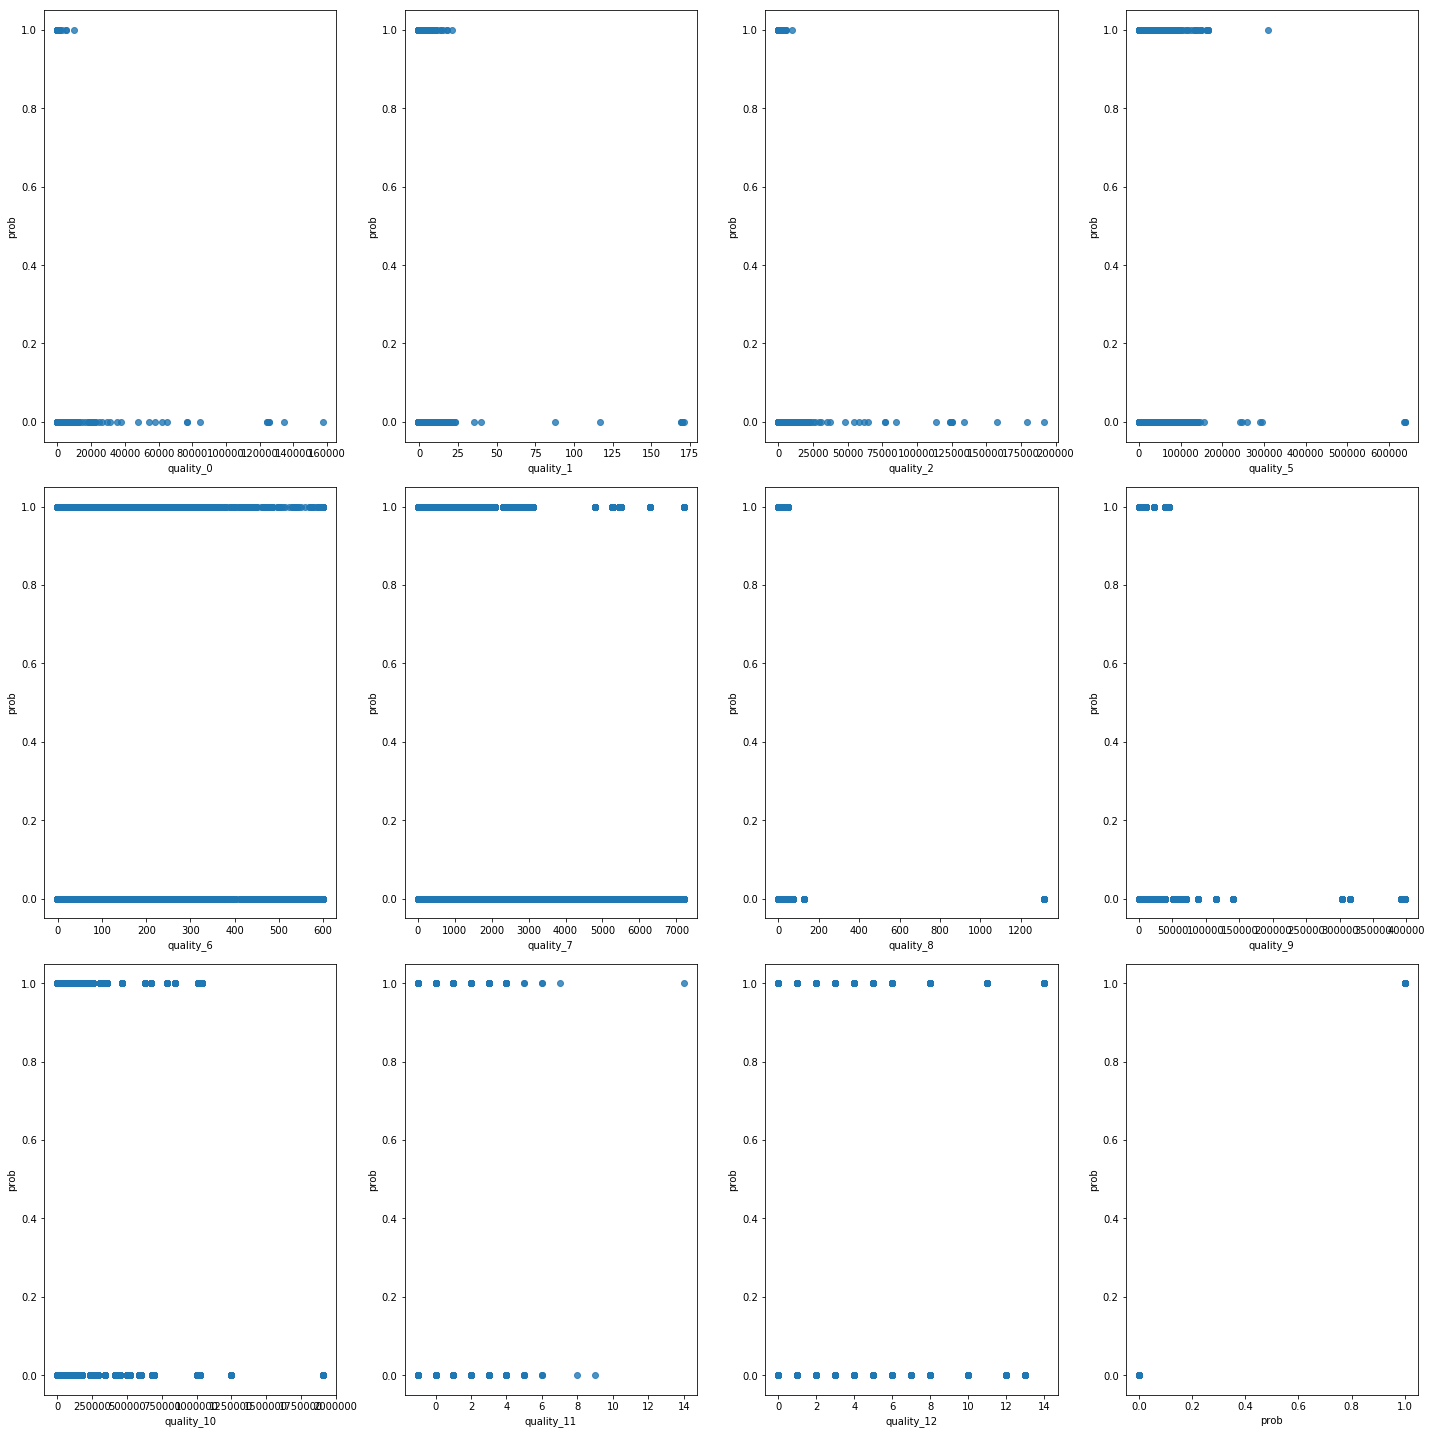

In [355]:
fig = plt.figure(figsize=(20,20))
for index in range(len(lb_qual.columns)):
    plt.subplot(3,4,index+1)
    sns.regplot(x=lb_qual.iloc[:, index], y=lb_qual['prob'], fit_reg=False)
fig.tight_layout(pad=1.0)

# 2. Data Processing

## Removing Redundant Features

Features with multicollinearity - from correlation matrix

In [356]:
new_train_qual[new_train_qual['quality_0'].isnull()].shape, new_train_qual[new_train_qual['quality_2'].isnull()].shape

((144432, 14), (40113, 14))

In [357]:
new_train_qual[new_train_qual['quality_6'].isnull()].shape, new_train_qual[new_train_qual['quality_7'].isnull()].shape

((0, 14), (0, 14))

In [358]:
del new_train_qual['quality_0']
del new_train_qual['quality_6']
new_train_qual.head()

,user_id,fwver,time,quality_1,quality_2,quality_5,quality_7,quality_8,quality_9,quality_10,quality_11,quality_12
0,10000,05.15.2138,20201129090000,0,0.0,0.0,0.0,0.0,0.0,4.0,0,0
1,10000,05.15.2138,20201129090000,0,0.0,0.0,0.0,0.0,0.0,4.0,0,0
2,10000,05.15.2138,20201129090000,0,0.0,0.0,0.0,0.0,0.0,4.0,0,0
3,10000,05.15.2138,20201129090000,0,0.0,0.0,0.0,0.0,0.0,4.0,0,0
4,10000,05.15.2138,20201129090000,0,0.0,0.0,0.0,0.0,0.0,4.0,0,0


Features with missing values

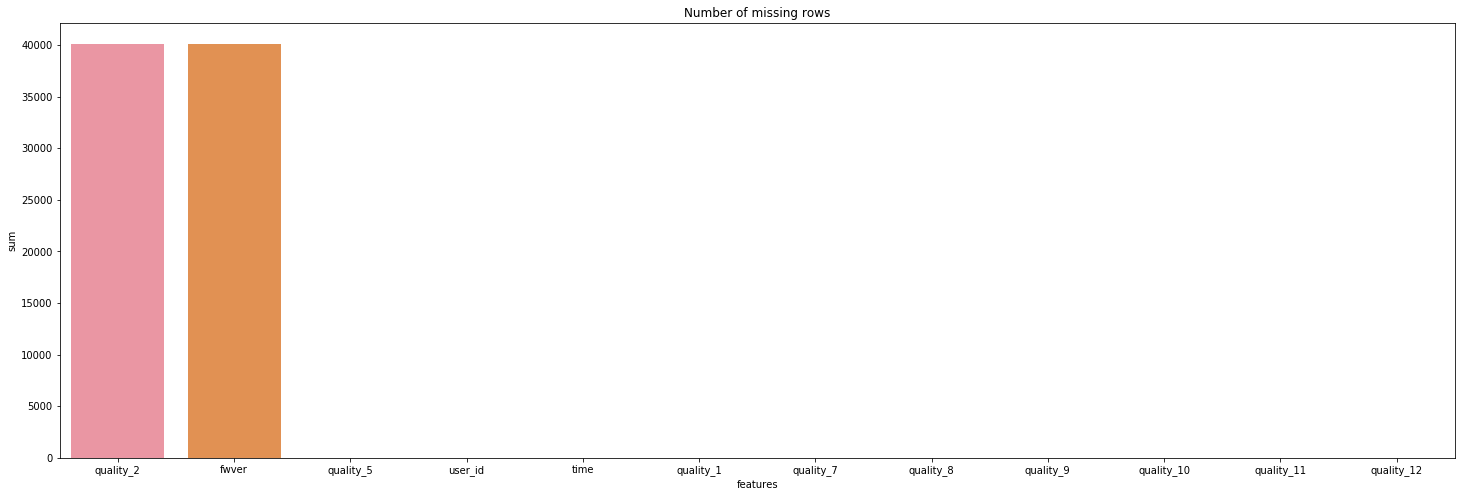

In [359]:
plt.figure(figsize=(25,8))
plt.title('Number of missing rows')
missing_count = pd.DataFrame(new_train_qual.isnull().sum(), columns=['sum']).sort_values(by=['sum'],ascending=False).head(20).reset_index()
missing_count.columns = ['features','sum']
sns.barplot(x='features',y='sum', data = missing_count)

In [360]:
new_train_qual['quality_2'].isnull().sum(), new_train_qual['fwver'].isnull().sum()

(40113, 40080)

Removing features that have mostly just 1 value

In [361]:
for i in ['1', '2', '5', '7', '8', '9', '10', '11', '12']:
    print(new_train_qual['quality_' + i].value_counts() / np.float(len(new_train_qual)))

 0      0.808895
-1      0.185427
 1      0.003098
 2      0.001376
 3      0.000472
 4      0.000244
 5      0.000162
 6      0.000086
 7      0.000060
 8      0.000042
 9      0.000031
 10     0.000029
 11     0.000014
 12     0.000008
 13     0.000007
 14     0.000006
 170    0.000005
 18     0.000005
 20     0.000005
 21     0.000005
 16     0.000004
 17     0.000004
 15     0.000004
 169    0.000002
 23     0.000002
 171    0.000001
 19     0.000001
 35     0.000001
 40     0.000001
 88     0.000001
 117    0.000001
Name: quality_1, dtype: float64
 0.0        0.763276
-1.0        0.174255
 1.0        0.003544
 2.0        0.001295
 3.0        0.000700
 4.0        0.000549
 5.0        0.000515
 6.0        0.000466
 7.0        0.000407
 9.0        0.000379
 10.0       0.000350
 8.0        0.000344
 11.0       0.000298
 13.0       0.000279
 12.0       0.000279
 14.0       0.000240
 16.0       0.000223
 15.0       0.000209
 17.0       0.000179
 18.0       0.000154
 19.0       0.000148


In [611]:
for i in ['1', '2', '5', '7', '8', '10', '11']:
    print(max(new_train_qual['quality_' + i].value_counts() / np.float(len(new_train_qual))))

0.8088952287165229
0.7632762266118288
0.5166348066191663
0.9145136998204252
0.950747262932283
0.12047442507096101
0.8112593890594528


quality 9, 12는 96% 이상 하나의 값으로 구성 -> 제거

In [362]:
del new_train_qual['quality_9']
del new_train_qual['quality_12']
print(new_train_qual.shape)
new_train_qual.head()

(828624, 10)


,user_id,fwver,time,quality_1,quality_2,quality_5,quality_7,quality_8,quality_10,quality_11
0,10000,05.15.2138,20201129090000,0,0.0,0.0,0.0,0.0,4.0,0
1,10000,05.15.2138,20201129090000,0,0.0,0.0,0.0,0.0,4.0,0
2,10000,05.15.2138,20201129090000,0,0.0,0.0,0.0,0.0,4.0,0
3,10000,05.15.2138,20201129090000,0,0.0,0.0,0.0,0.0,4.0,0
4,10000,05.15.2138,20201129090000,0,0.0,0.0,0.0,0.0,4.0,0


In [610]:
new_train_qual.describe()

,user_id,time,quality_1,quality_2,quality_5,quality_7,quality_8,quality_10,quality_11
count,828624.000000,8.286240e+05,828624.000000,788511.000000,828604.000000,828624.000000,828624.000000,8.286240e+05,828624.000000
mean,17574.678315,2.020112e+13,-0.171782,4.751094,74.533171,26.744106,0.163732,8.965973e+02,-0.181638
std,4374.113554,8.863638e+06,0.692386,586.252469,2278.661590,317.874778,5.154260,1.652103e+04,0.397767
min,10000.000000,2.020103e+13,-1.000000,-1.000000,-1.000000,0.000000,0.000000,0.000000e+00,-1.000000
25%,13685.000000,2.020111e+13,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000e+00,0.000000
50%,17597.000000,2.020112e+13,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000e+00,0.000000
75%,21423.000000,2.020112e+13,0.000000,0.000000,1.000000,0.000000,0.000000,3.900000e+01,0.000000
max,24997.000000,2.020113e+13,171.000000,191859.000000,637385.000000,7200.000000,1317.000000,1.910175e+06,14.000000


## Dealing with Outliers

## Filling missing Values

In [363]:
pd.DataFrame(new_train_qual.isnull().sum(), columns=['sum']).sort_values(by=['sum'],ascending=False)

,sum
quality_2,40113
fwver,40080
quality_5,20
user_id,0
time,0
quality_1,0
quality_7,0
quality_8,0
quality_10,0
quality_11,0


In [364]:
new_train_qual.groupby('user_id').mean().head()

,time,quality_1,quality_2,quality_5,quality_7,quality_8,quality_10,quality_11
user_id,,,,,,,,
10000,2.020113e+13,0.000000,0.000000,0.500000,0.000000,0.0,6.000,0.000000
10002,2.020112e+13,-0.020833,-0.010417,0.302083,5.750000,0.0,3.875,-0.020833
10004,2.020110e+13,-0.083333,-0.083333,0.083333,43.500000,0.0,2.000,-0.083333
10005,2.020112e+13,-0.416667,-0.416667,0.000000,18.000000,0.0,5.000,-0.416667
10006,2.020112e+13,0.000000,0.000000,0.333333,1.333333,0.0,4.000,0.000000


In [365]:
new_train_qual.set_index(['fwver', 'time'])

user_id  quality_1  quality_2  quality_5  \
fwver      time                                                       
05.15.2138 20201129090000    10000          0        0.0        0.0   
           20201129090000    10000          0        0.0        0.0   
           20201129090000    10000          0        0.0        0.0   
           20201129090000    10000          0        0.0        0.0   
           20201129090000    10000          0        0.0        0.0   
           20201129090000    10000          0        0.0        0.0   
           20201129090000    10000          0        0.0        4.0   
           20201129090000    10000          0        0.0        0.0   
           20201129090000    10000          0        0.0        0.0   
           20201129090000    10000          0        0.0        0.0   
           20201129090000    10000          0        0.0        0.0   
           20201129090000    10000          0        0.0        0.0   
           20201130210000    10000          0        0.0        0.0   
           20201130210000    10000          0        0.0        0.0   
           20201130210000    10000          0        0.0        0.0   
           20201130210000    10000          0        0.0        0.0   
           20201130210000    10000          0        0.0        0.0   
           20201130210000    10000          0        0.0        0.0   
           20201130210000    10000          0        0.0        0.0   
           20201130210000    10000          0        0.0        0.0   
           20201130210000    10000          0        0.0        0.0   
           20201130210000    10000          0        0.0        0.0   
           20201130210000    10000          0        0.0        8.0   
           20201130210000    10000          0        0.0        0.0   
           20201104110000    10002          0        0.0        0.0   
           20201104110000    10002          0        0.0        0.0   
           20201104110000    10002          0        1.0        0.0   
           20201104110000    10002          0        0.0        0.0   
           20201104110000    10002          0        0.0        0.0   
           20201104110000    10002          0        0.0        0.0   
...                            ...        ...        ...        ...   
04.33.1261 20201129002000    24995          0        0.0        0.0   
           20201129002000    24995          0        0.0        0.0   
           20201129002000    24995          0        0.0        0.0   
           20201129002000    24995          0        0.0        3.0   
           20201129002000    24995          0        0.0        0.0   
           20201129002000    24995          0        0.0        0.0   
04.22.1750 20201108230000    24997          0        0.0        0.0   
           20201108230000    24997          0        0.0        0.0   
           20201108230000    24997          0        0.0        2.0   
           20201108230000    24997          0        0.0        0.0   
           20201108230000    24997          0        0.0        0.0   
           20201108230000    24997          0        0.0        0.0   
           20201108230000    24997          0        0.0        0.0   
           20201108230000    24997          0        0.0        0.0   
           20201108230000    24997         -1       -1.0       -1.0   
           20201108230000    24997         -1       -1.0       -1.0   
           20201108230000    24997         -1       -1.0       -1.0   
           20201108230000    24997         -1       -1.0       -1.0   
04.22.1778 20201124033000    24997          0        0.0        0.0   
           20201124033000    24997          0        0.0        0.0   
           20201124033000    24997          0        0.0        0.0   
           20201124033000    24997          0        0.0        2.0   
           20201124033000    24997          0        0.0        0.0   
           20201124033000    24997          0      

In [366]:
new_train_qual.groupby('user_id').sum().shape

(8281, 8)

case1: missing value 0으로 채우기

In [613]:
train_qual_0 = new_train_qual.fillna(0)
train_qual_0.head()

,user_id,fwver,time,quality_1,quality_2,quality_5,quality_7,quality_8,quality_10,quality_11
0,10000,05.15.2138,20201129090000,0,0.0,0.0,0.0,0.0,4.0,0
1,10000,05.15.2138,20201129090000,0,0.0,0.0,0.0,0.0,4.0,0
2,10000,05.15.2138,20201129090000,0,0.0,0.0,0.0,0.0,4.0,0
3,10000,05.15.2138,20201129090000,0,0.0,0.0,0.0,0.0,4.0,0
4,10000,05.15.2138,20201129090000,0,0.0,0.0,0.0,0.0,4.0,0


In [632]:
train_qual_0.groupby('user_id').mean().head()

,time,quality_1,quality_2,quality_5,quality_7,quality_8,quality_10,quality_11
user_id,,,,,,,,
10000,2.020113e+13,0.000000,0.000000,0.500000,0.000000,0.0,6.000,0.000000
10002,2.020112e+13,-0.020833,-0.010417,0.302083,5.750000,0.0,3.875,-0.020833
10004,2.020110e+13,-0.083333,-0.083333,0.083333,43.500000,0.0,2.000,-0.083333
10005,2.020112e+13,-0.416667,-0.416667,0.000000,18.000000,0.0,5.000,-0.416667
10006,2.020112e+13,0.000000,0.000000,0.333333,1.333333,0.0,4.000,0.000000


In [633]:
train_qual_0.groupby('user_id').std().head()

,time,quality_1,quality_2,quality_5,quality_7,quality_8,quality_10,quality_11
user_id,,,,,,,,
10000,5.720444e+05,0.000000,0.000000,1.793709,0.000000,0.0,2.043016,0.000000
10002,9.200353e+06,0.143576,0.177396,1.037404,14.547924,0.0,2.327185,0.143576
10004,9.658357e+05,0.282330,0.282330,0.583592,44.435591,0.0,1.021508,0.282330
10005,1.021508e+04,0.503610,0.503610,1.179536,18.387141,0.0,1.021508,0.503610
10006,7.376238e+06,0.000000,0.000000,1.121224,1.912366,0.0,0.000000,0.000000


In [634]:
qual_0 = train_qual_0.groupby('user_id').mean().loc[:, 'quality_1':'quality_11']
qual_0.head()

,quality_1,quality_2,quality_5,quality_7,quality_8,quality_10,quality_11
user_id,,,,,,,
10000,0.000000,0.000000,0.500000,0.000000,0.0,6.000,0.000000
10002,-0.020833,-0.010417,0.302083,5.750000,0.0,3.875,-0.020833
10004,-0.083333,-0.083333,0.083333,43.500000,0.0,2.000,-0.083333
10005,-0.416667,-0.416667,0.000000,18.000000,0.0,5.000,-0.416667
10006,0.000000,0.000000,0.333333,1.333333,0.0,4.000,0.000000


In [649]:
full_qual_0 = np.zeros((15000, 7))
# error와 동일한 방법으로 person_idx - 10000 위치에 
# person_idx의 problem이 한 번이라도 발생했다면 1
# 없다면 0
full_qual_0[qual_0.index-10000] = qual_0.loc[qual_0.index]
full_qual_0

array([[ 0.        ,  0.        ,  0.5       , ...,  0.        ,
         6.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-0.02083333, -0.01041667,  0.30208333, ...,  0.        ,
         3.875     , -0.02083333],
       ...,
       [-0.16666667, -0.16666667,  0.625     , ...,  0.        ,
         9.5       , -0.16666667],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

In [651]:
train_x

array([[ 0.,  0.,  8., ...,  0.,  0., 24.],
       [ 0.,  0.,  0., ..., 56.,  1.,  0.],
       [ 0.,  0.,  2., ...,  0.,  0., 96.],
       ...,
       [ 0.,  0.,  0., ...,  8.,  5., 24.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  4., ...,  0.,  0.,  0.]])

# Categorical features - train_err

In [367]:
train_err.isnull().any()

user_id     False
time        False
model_nm    False
fwver       False
errtype     False
errcode      True
dtype: bool

In [368]:
train_err.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16554663 entries, 0 to 16554662
Data columns (total 6 columns):
user_id     int64
time        int64
model_nm    object
fwver       object
errtype     int64
errcode     object
dtypes: int64(3), object(3)
memory usage: 757.8+ MB


model_nm의 값은 fwver에 포함 -> delete model_nm

In [369]:
del train_err['model_nm']
train_err.head()

,user_id,time,fwver,errtype,errcode
0,10000,20201101025616,05.15.2138,15,1
1,10000,20201101030309,05.15.2138,12,1
2,10000,20201101030309,05.15.2138,11,1
3,10000,20201101050514,05.15.2138,16,1
4,10000,20201101050515,05.15.2138,4,0


In [370]:
cat_col = ['fwver', 'errtype', 'errcode']

cat_train_err = train_err[cat_col].copy()
cat_train_err.head()

,fwver,errtype,errcode
0,05.15.2138,15,1
1,05.15.2138,12,1
2,05.15.2138,11,1
3,05.15.2138,16,1
4,05.15.2138,4,0


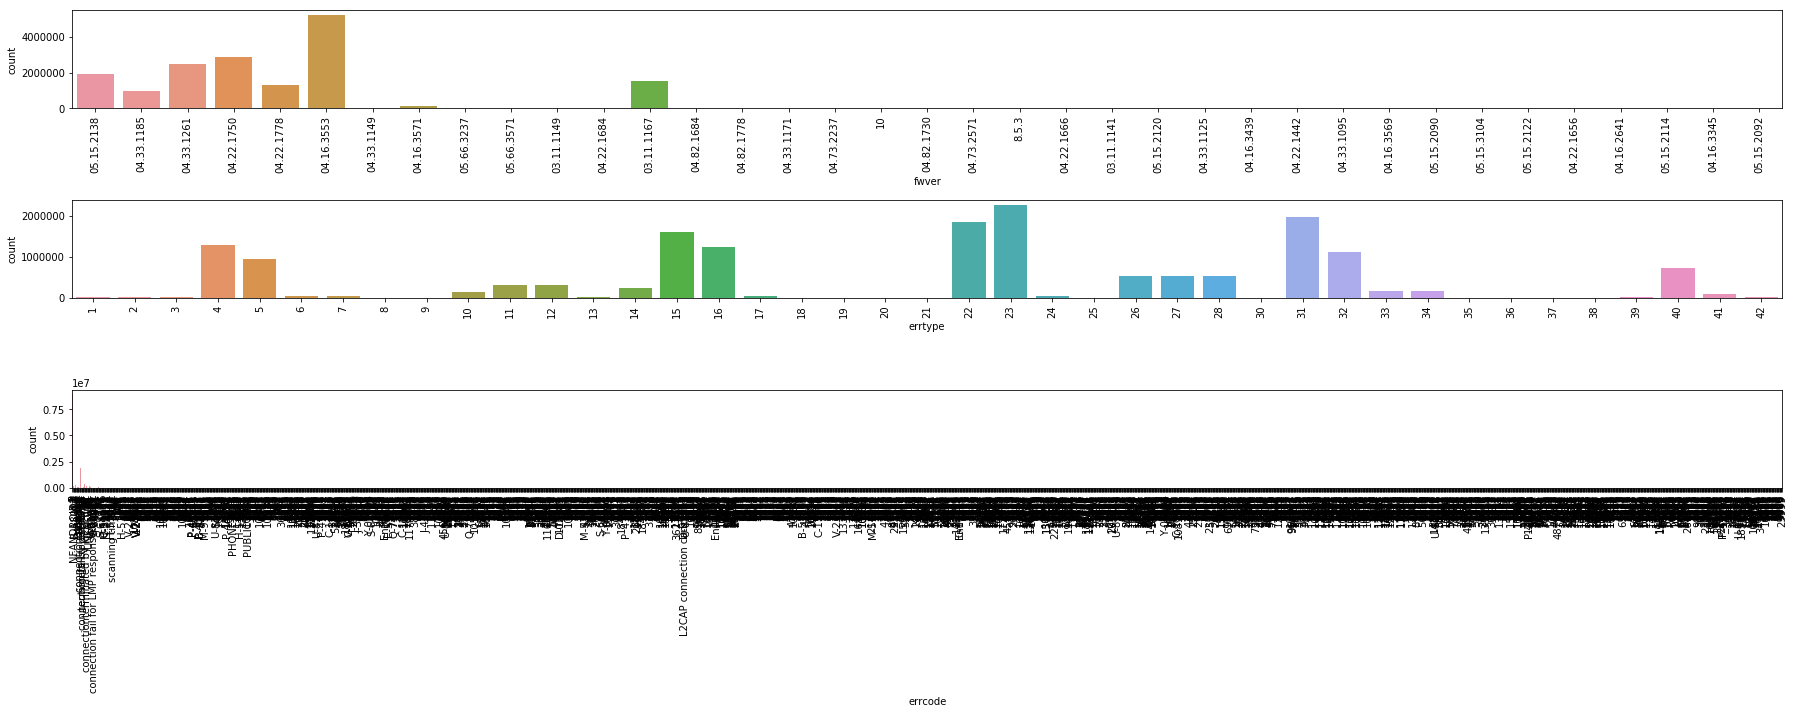

In [371]:
fig = plt.figure(figsize=(25,10))
for index in range(len(cat_col)):
    plt.subplot(3,1,index+1)
    sns.countplot(x=cat_train_err.iloc[:,index], data=cat_train_err.dropna())
    plt.xticks(rotation=90)
fig.tight_layout(pad=1.0)

## Features with a lot of missing values - train_err

In [372]:
len(cat_train_err[cat_train_err['errcode'].isnull()])

1

In [373]:
len(cat_train_err['errcode'].unique()), train_err.shape

(2806, (16554663, 5))

In [255]:
print(cat_train_err['errcode'].value_counts() / np.float(len(cat_train_err)))

1                                     5.380337e-01
0                                     1.570025e-01
connection timeout                    1.108811e-01
B-A8002                               5.423626e-02
80                                    2.017667e-02
79                                    2.008026e-02
14                                    1.592162e-02
active                                1.324328e-02
2                                     1.005046e-02
84                                    7.845282e-03
85                                    7.716497e-03
standby                               6.667004e-03
NFANDROID2                            6.290554e-03
connection fail to establish          6.097376e-03
3                                     5.510411e-03
90                                    3.986309e-03
89                                    3.914245e-03
S-61001                               2.091918e-03
95                                    1.416640e-03
94                             

## Converting Categorical to Numerical

In [374]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
from tqdm import tqdm
import gc
import random
import lightgbm as lgb
import re
from sklearn.metrics import *
from sklearn.model_selection import KFold
import warnings
warnings.filterwarnings(action='ignore')

In [375]:
train_user_id_max = 24999
train_user_id_min = 10000
train_user_number = 15000

id_error = train_err[['user_id','errtype']].values
error = np.zeros((train_user_number,42))

for person_idx, err in tqdm(id_error):
    # person_idx - train_user_id_min 위치에 person_idx, errtype에 해당하는 error값을 +1
    error[person_idx - train_user_id_min,err - 1] += 1
error.shape

100%|██████████| 16554663/16554663 [00:45<00:00, 360574.37it/s]


(15000, 42)

In [376]:
problem = np.zeros(15000)
# error와 동일한 방법으로 person_idx - 10000 위치에 
# person_idx의 problem이 한 번이라도 발생했다면 1
# 없다면 0
problem[train_prob.user_id.unique()-10000] = 1 
problem.shape

(15000,)

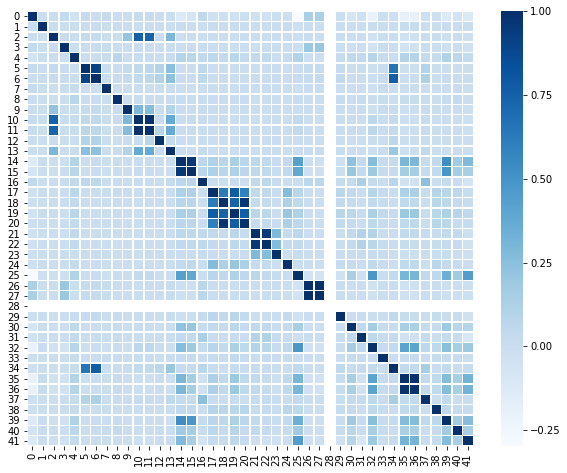

In [377]:
plt.figure(figsize=(10,8))
correlation = pd.DataFrame(error).corr()
sns.heatmap(correlation, linewidth=0.5, cmap='Blues')

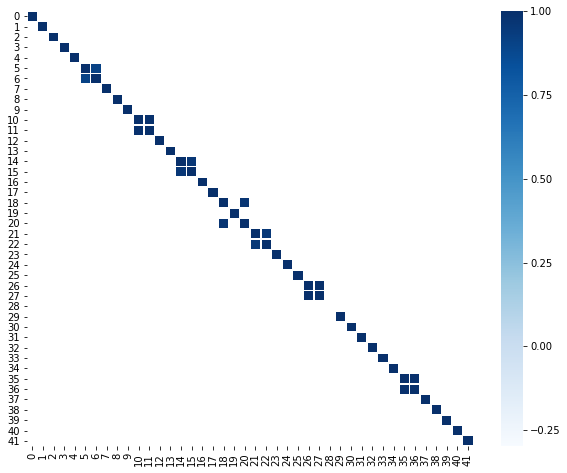

In [378]:
plt.figure(figsize=(10,8))
correlation = pd.DataFrame(error).corr()
sns.heatmap(correlation, mask = correlation <0.8, linewidth=0.5, cmap='Blues')

관련된 error 지우기: 6-5 / 11-10 / 15-14 / 20-18 / 22-21 / 28 / 36 - 35


In [379]:
error = np.delete(error,(36), axis=1)
error = np.delete(error,(28), axis=1)
error = np.delete(error,(22), axis=1)
error = np.delete(error,(20), axis=1)
error = np.delete(error,(15), axis=1)
error = np.delete(error,(11), axis=1)
error = np.delete(error,(6), axis=1)

error

array([[  0.,   0.,   8., ...,   0.,   0.,   0.],
       [  0.,   0.,   0., ..., 113.,  56.,   1.],
       [  0.,   0.,   2., ...,   0.,   0.,   0.],
       ...,
       [  0.,   0.,   0., ...,  58.,   8.,   5.],
       [  0.,   0.,   0., ...,   6.,   0.,   0.],
       [  0.,   0.,   4., ...,   0.,   0.,   0.]])

In [380]:
error.shape

(15000, 35)

In [381]:
error

array([[  0.,   0.,   8., ...,   0.,   0.,   0.],
       [  0.,   0.,   0., ..., 113.,  56.,   1.],
       [  0.,   0.,   2., ...,   0.,   0.,   0.],
       ...,
       [  0.,   0.,   0., ...,  58.,   8.,   5.],
       [  0.,   0.,   0., ...,   6.,   0.,   0.],
       [  0.,   0.,   4., ...,   0.,   0.,   0.]])

In [382]:
new_train_qual.set_index(['user_id', 'fwver']).sort_values(by=['user_id', 'time']).drop_duplicates(
    subset=['quality_1', 'quality_2', 'quality_5', 'quality_7', 'quality_8', 'quality_10', 'quality_11'])

time  quality_1  quality_2  quality_5  \
user_id fwver                                                         
10000   05.15.2138  20201129090000          0        0.0        0.0   
        05.15.2138  20201129090000          0        0.0        4.0   
        05.15.2138  20201130210000          0        0.0        0.0   
        05.15.2138  20201130210000          0        0.0        8.0   
10002   05.15.2138  20201104110000          0        0.0        0.0   
        05.15.2138  20201104110000          0        1.0        0.0   
        05.15.2138  20201106010000          0        0.0        0.0   
        05.15.2138  20201106010000          0        0.0        2.0   
        05.15.2138  20201111010000          0        0.0        0.0   
        05.15.2138  20201111010000          0        0.0        1.0   
        05.15.2138  20201111010000          0        0.0        2.0   
        05.15.2138  20201115130000          0        0.0        0.0   
        05.15.2138  20201115130000          0        0.0        5.0   
        05.15.2138  20201118001000         -1       -1.0       -1.0   
        05.15.2138  20201118001000          0        0.0        3.0   
        05.15.2138  20201118001000          0        0.0        0.0   
        05.15.2138  20201119141000          0        0.0        0.0   
        05.15.2138  20201119141000          0        0.0        3.0   
        05.15.2138  20201130010000          0        0.0        5.0   
        05.15.2138  20201130010000          0        0.0        2.0   
        05.15.2138  20201130010000          0        0.0        1.0   
        05.15.2138  20201130030000          0        0.0        0.0   
        05.15.2138  20201130030000          0        0.0        1.0   
        05.15.2138  20201130030000          0        0.0        5.0   
10004   04.22.1750  20201102232000          0        0.0        1.0   
        04.22.1750  20201102232000          0        0.0        2.0   
        04.22.1750  20201104123000          0        0.0        0.0   
        04.22.1750  20201104123000          0        0.0        1.0   
10005   04.22.1750  20201119020000          0        0.0        3.0   
        04.22.1750  20201119040000          0        0.0        3.0   
...                            ...        ...        ...        ...   
24979   05.15.2138  20201106041000          0        0.0        0.0   
        05.15.2138  20201106041000          0        0.0        1.0   
        05.15.2138  20201119152000          0        0.0        0.0   
        05.15.2138  20201119152000          0        0.0        2.0   
        05.15.2138  20201125032000          0        0.0        0.0   
        05.15.2138  20201125032000          0        0.0        2.0   
        05.15.2138  20201125032000          0        0.0     7998.0   
24981   04.22.1778  20201125025000          0        0.0        0.0   
        04.22.1778  20201125025000          0        0.0     9558.0   
24982   NaN         20201109025000          0        NaN       17.0   
        NaN         20201109045000         -1        NaN        3.0   
        NaN         20201109145000          0        NaN        0.0   
        NaN         20201109145000          0        NaN        3.0   
        NaN         20201109145000          0        NaN       28.0   
        NaN         20201109145000          0        NaN        6.0   
        NaN         20201109145000          0        NaN       15.0   
        NaN         20201109145000          0        NaN        2.0   
24984   04.16.3553  20201130103000         -1       -1.0       -1.0   
        04.16.3553  20201130103000          0        0.0        0.0   
        04.16.3553  20201130103000          0        0.0       10.0   
24985   04.16.3553  20201107210000          0        0.0       31.0   
24986   05.15.2138  20201105164000          0        0.0        3.0   
        05.15.2138  20201105164000          0        0.0        5.0   
        05.15.2138  20201105164000          0        0

# Model

기존 baseline에서 early stopping 100: 0.8016729648999995

## test1

In [384]:
def f_pr_auc(probas_pred, y_true):
    labels=y_true.get_label()
    p, r, _ = precision_recall_curve(labels, probas_pred)
    score=auc(r,p) 
    return "pr_auc", score, True

train_x = error
train_y = problem

models     = []
recalls    = []
precisions = []
auc_scores   = []
threshold = 0.5
# 파라미터 설정
params =      {
                'boosting_type' : 'gbdt',
                'objective'     : 'binary',
                'metric'        : 'auc',
                'seed': 1015
                }

# 5 Kfold cross validation
k_fold = KFold(n_splits=5, shuffle=True, random_state=42)
for train_idx, val_idx in k_fold.split(train_x):

    # split train, validation set
    X = train_x[train_idx]
    y = train_y[train_idx]
    valid_x = train_x[val_idx]
    valid_y = train_y[val_idx]

    d_train= lgb.Dataset(X, y)
    d_val  = lgb.Dataset(valid_x, valid_y)
    
    #run traning
    model = lgb.train(
                        params,
                        train_set       = d_train,
                        num_boost_round = 1000,
                        valid_sets      = d_val,
                        feval           = f_pr_auc,
                        verbose_eval    = 20, 
                        early_stopping_rounds = 100
                       )
    
    # cal valid prediction
    valid_prob = model.predict(valid_x)
    valid_pred = np.where(valid_prob > threshold, 1, 0)
    
    # cal scores
    recall    = recall_score(    valid_y, valid_pred)
    precision = precision_score( valid_y, valid_pred)
    auc_score = roc_auc_score(   valid_y, valid_prob)

    # append scores
    models.append(model)
    recalls.append(recall)
    precisions.append(precision)
    auc_scores.append(auc_score)

    print('==========================================================')

[LightGBM] [Info] Number of positive: 3633, number of negative: 8367
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003686 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3637
[LightGBM] [Info] Number of data points in the train set: 12000, number of used features: 35
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.302750 -> initscore=-0.834237
[LightGBM] [Info] Start training from score -0.834237
Training until validation scores don't improve for 100 rounds
[20]	valid_0's auc: 0.799042	valid_0's pr_auc: 0.792403
[40]	valid_0's auc: 0.803282	valid_0's pr_auc: 0.797189
[60]	valid_0's auc: 0.801445	valid_0's pr_auc: 0.796304
[80]	valid_0's auc: 0.801496	valid_0's pr_auc: 0.796672
[100]	valid_0's auc: 0.801662	valid_0's pr_auc: 0.795217
[120]	valid_0's auc: 0.801437	valid_0's pr_auc: 0.794896
Early stopping, best iteration is:
[32]	valid_0's auc: 0.802372	valid_0's pr_auc: 0.79811
[LightGBM] [Inf

In [385]:
print(np.mean(auc_scores))

0.8008689113520724


In [389]:
test_err  = pd.read_csv('./data/test_err_data.csv')
test_user_id_max = 44998
test_user_id_min = 30000
test_user_number = 14999
id_error = test_err[['user_id','errtype']].values
test_x = np.zeros((test_user_number,42))
for person_idx, err in tqdm(id_error):
    # person_idx - test_user_id_min 위치에 person_idx, errtype에 해당하는 error값을 +1
    test_x[person_idx - test_user_id_min,err - 1] += 1
test_x = test_x.reshape(test_x.shape[0],-1)
print(test_x.shape)
test_x

100%|██████████| 16532648/16532648 [00:45<00:00, 360384.43it/s]

(14999, 42)


array([[  0.,   0.,   0., ...,  92.,   0.,   2.],
       [  0.,   0.,   3., ...,   0.,   0.,   0.],
       [  0.,   0.,   0., ..., 113.,   1.,   2.],
       ...,
       [  0.,   0.,   0., ..., 329.,   2.,   3.],
       [  0.,   0.,   0., ...,  30.,  49.,   0.],
       [  0.,   0.,   0., ..., 269.,   0.,   0.]])

In [390]:
test_x = np.delete(test_x,(36), axis=1)
test_x = np.delete(test_x,(28), axis=1)
test_x = np.delete(test_x,(22), axis=1)
test_x = np.delete(test_x,(20), axis=1)
test_x = np.delete(test_x,(15), axis=1)
test_x = np.delete(test_x,(11), axis=1)
test_x = np.delete(test_x,(6), axis=1)

test_x.shape

(14999, 35)

In [395]:
pred_y_list = []
for model in models:
    pred_y = model.predict(test_x)
    pred_y_list.append(pred_y.reshape(-1,1))
    
pred_ensemble = np.mean(pred_y_list, axis = 0)
sample_submssion = pd.read_csv('./data/sample_submission.csv')
sample_submssion['problem'] = pred_ensemble.reshape(-1)

In [398]:
sample_submssion.to_csv("test1.csv", index = False)
pd.read_csv('test1.csv').head()

,user_id,problem
0,30000,0.789681
1,30001,0.214027
2,30002,0.302600
3,30003,0.711387
4,30004,0.549704


test1: error type feature 35개로 줄임, early_stopping=100 -> cross_validation score 0.8008689113520724

## test2

In [399]:
train_x = error
train_y = problem

models     = []
recalls    = []
precisions = []
auc_scores   = []
threshold = 0.5
# 파라미터 설정
params =      {
                'boosting_type' : 'gbdt',
                'objective'     : 'binary',
                'metric'        : 'auc',
                'seed': 1015
                }

# 5 Kfold cross validation
k_fold = KFold(n_splits=5, shuffle=True, random_state=42)
for train_idx, val_idx in k_fold.split(train_x):

    # split train, validation set
    X = train_x[train_idx]
    y = train_y[train_idx]
    valid_x = train_x[val_idx]
    valid_y = train_y[val_idx]

    d_train= lgb.Dataset(X, y)
    d_val  = lgb.Dataset(valid_x, valid_y)
    
    #run traning
    model = lgb.train(
                        params,
                        train_set       = d_train,
                        num_boost_round = 1000,
                        valid_sets      = d_val,
                        feval           = f_pr_auc,
                        verbose_eval    = 20, 
                        early_stopping_rounds = 3
                       )
    
    # cal valid prediction
    valid_prob = model.predict(valid_x)
    valid_pred = np.where(valid_prob > threshold, 1, 0)
    
    # cal scores
    recall    = recall_score(    valid_y, valid_pred)
    precision = precision_score( valid_y, valid_pred)
    auc_score = roc_auc_score(   valid_y, valid_prob)

    # append scores
    models.append(model)
    recalls.append(recall)
    precisions.append(precision)
    auc_scores.append(auc_score)

    print('==========================================================')

[LightGBM] [Info] Number of positive: 3633, number of negative: 8367
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002322 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3637
[LightGBM] [Info] Number of data points in the train set: 12000, number of used features: 35
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.302750 -> initscore=-0.834237
[LightGBM] [Info] Start training from score -0.834237
Training until validation scores don't improve for 3 rounds
Early stopping, best iteration is:
[3]	valid_0's auc: 0.773009	valid_0's pr_auc: 0.778089
[LightGBM] [Info] Number of positive: 4828, number of negative: 7172
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001970 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3772
[LightGBM] [Info] Number of data points in the train set: 12000, number of used feature

In [400]:
print(np.mean(auc_scores))

0.7811829297500836


In [401]:
test_err  = pd.read_csv('./data/test_err_data.csv')
test_user_id_max = 44998
test_user_id_min = 30000
test_user_number = 14999
id_error = test_err[['user_id','errtype']].values
test_x = np.zeros((test_user_number,42))
for person_idx, err in tqdm(id_error):
    # person_idx - test_user_id_min 위치에 person_idx, errtype에 해당하는 error값을 +1
    test_x[person_idx - test_user_id_min,err - 1] += 1
test_x = test_x.reshape(test_x.shape[0],-1)
print(test_x.shape)

test_x = np.delete(test_x,(36), axis=1)
test_x = np.delete(test_x,(28), axis=1)
test_x = np.delete(test_x,(22), axis=1)
test_x = np.delete(test_x,(20), axis=1)
test_x = np.delete(test_x,(15), axis=1)
test_x = np.delete(test_x,(11), axis=1)
test_x = np.delete(test_x,(6), axis=1)

pred_y_list = []
for model in models:
    pred_y = model.predict(test_x)
    pred_y_list.append(pred_y.reshape(-1,1))
    
pred_ensemble = np.mean(pred_y_list, axis = 0)
sample_submssion = pd.read_csv('./data/sample_submission.csv')
sample_submssion['problem'] = pred_ensemble.reshape(-1)

sample_submssion.to_csv("test2.csv", index = False)
pd.read_csv('test2.csv').head()

100%|██████████| 16532648/16532648 [00:45<00:00, 362681.69it/s]


(14999, 42)


,user_id,problem
0,30000,0.483474
1,30001,0.274291
2,30002,0.318271
3,30003,0.507457
4,30004,0.423353


test2: error type 35, early stopping 3 -> cross_val: 0.7811829297500836 -> errortype 걍 놔두자

## test3

In [12]:
import numpy as np
#id_error = train_err[['user_id','errtype']].values
#error = np.zeros((train_user_number,42))

#for person_idx, err in tqdm(id_error):
    # person_idx - train_user_id_min 위치에 person_idx, errtype에 해당하는 error값을 +1
#    error[person_idx - train_user_id_min,err - 1] += 1
    
train_prob = pd.read_csv('./data/train_problem_data.csv')
problem = np.zeros(15000)
# error와 동일한 방법으로 person_idx - 10000 위치에 
# person_idx의 problem이 한 번이라도 발생했다면 1
# 없다면 0
problem[train_prob.user_id.unique()-10000] = 1 

#train_x = error
train_y = problem
    
#train_x.shape, train_y.shape

In [411]:
train_qual_cnt = train_qual.groupby(by='user_id').count()['time']

In [431]:
qual_cnt = np.zeros(15000)
# error와 동일한 방법으로 person_idx - 10000 위치에 
# person_idx의 problem이 한 번이라도 발생했다면 1
# 없다면 0
qual_cnt[train_qual_cnt.index-10000] = train_qual_cnt.loc[train_qual_cnt.index]
qual_cnt

array([24.,  0., 96., ..., 24.,  0.,  0.])

In [453]:
train_x_ = np.concatenate((train_x, qual_cnt[:, None]), axis=1)
train_x_

array([[ 0.,  0.,  8., ...,  0.,  0., 24.],
       [ 0.,  0.,  0., ..., 56.,  1.,  0.],
       [ 0.,  0.,  2., ...,  0.,  0., 96.],
       ...,
       [ 0.,  0.,  0., ...,  8.,  5., 24.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  4., ...,  0.,  0.,  0.]])

In [458]:
train_x = train_x_
train_y = problem

models     = []
recalls    = []
precisions = []
auc_scores   = []
threshold = 0.5
# 파라미터 설정
params =      {
                'boosting_type' : 'gbdt',
                'objective'     : 'binary',
                'metric'        : 'auc',
                'seed': 1015
                }

# 5 Kfold cross validation
k_fold = KFold(n_splits=5, shuffle=True, random_state=42)
for train_idx, val_idx in k_fold.split(train_x):

    # split train, validation set
    X = train_x[train_idx]
    y = train_y[train_idx]
    valid_x = train_x[val_idx]
    valid_y = train_y[val_idx]

    d_train= lgb.Dataset(X, y)
    d_val  = lgb.Dataset(valid_x, valid_y)
    
    #run traning
    model = lgb.train(
                        params,
                        train_set       = d_train,
                        num_boost_round = 1000,
                        valid_sets      = d_val,
                        feval           = f_pr_auc,
                        verbose_eval    = 20, 
                        early_stopping_rounds = 100
                       )
    
    # cal valid prediction
    valid_prob = model.predict(valid_x)
    valid_pred = np.where(valid_prob > threshold, 1, 0)
    
    # cal scores
    recall    = recall_score(    valid_y, valid_pred)
    precision = precision_score( valid_y, valid_pred)
    auc_score = roc_auc_score(   valid_y, valid_prob)

    # append scores
    models.append(model)
    recalls.append(recall)
    precisions.append(precision)
    auc_scores.append(auc_score)

    print('==========================================================')
    
print(np.mean(auc_scores))

[LightGBM] [Info] Number of positive: 3633, number of negative: 8367
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002999 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4456
[LightGBM] [Info] Number of data points in the train set: 12000, number of used features: 42
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.302750 -> initscore=-0.834237
[LightGBM] [Info] Start training from score -0.834237
Training until validation scores don't improve for 100 rounds
[20]	valid_0's auc: 0.801231	valid_0's pr_auc: 0.794951
[40]	valid_0's auc: 0.804923	valid_0's pr_auc: 0.798824
[60]	valid_0's auc: 0.806443	valid_0's pr_auc: 0.799013
[80]	valid_0's auc: 0.806776	valid_0's pr_auc: 0.800289
[100]	valid_0's auc: 0.80605	valid_0's pr_auc: 0.800399
[120]	valid_0's auc: 0.804943	valid_0's pr_auc: 0.800081
[140]	valid_0's auc: 0.804287	valid_0's pr_auc: 0.799426
[160]	valid_0's auc: 0.803541	valid_0's pr_auc: 0

In [459]:
test_err  = pd.read_csv('./data/test_err_data.csv')
test_user_id_max = 44998
test_user_id_min = 30000
test_user_number = 14999
id_error = test_err[['user_id','errtype']].values
test_x = np.zeros((test_user_number,42))
for person_idx, err in tqdm(id_error):
    # person_idx - test_user_id_min 위치에 person_idx, errtype에 해당하는 error값을 +1
    test_x[person_idx - test_user_id_min,err - 1] += 1
test_x = test_x.reshape(test_x.shape[0],-1)
print(test_x.shape)

100%|██████████| 16532648/16532648 [00:46<00:00, 355410.42it/s]

(14999, 42)


In [468]:
test_qual = pd.read_csv('./data/test_quality_data.csv')

test_qual_cnt = test_qual.groupby(by='user_id').count()['time']

qual_cnt = np.zeros(14999)
qual_cnt[test_qual_cnt.index-test_user_id_min] = test_qual_cnt.loc[test_qual_cnt.index]
qual_cnt

array([ 12.,  36., 120., ..., 108.,  24.,   0.])

In [475]:
test_x_ = np.concatenate((test_x, qual_cnt[:, None]), axis=1)
test_x_

array([[  0.,   0.,   0., ...,   0.,   2.,  12.],
       [  0.,   0.,   3., ...,   0.,   0.,  36.],
       [  0.,   0.,   0., ...,   1.,   2., 120.],
       ...,
       [  0.,   0.,   0., ...,   2.,   3., 108.],
       [  0.,   0.,   0., ...,  49.,   0.,  24.],
       [  0.,   0.,   0., ...,   0.,   0.,   0.]])

In [476]:
pred_y_list = []
for model in models:
    pred_y = model.predict(test_x_)
    pred_y_list.append(pred_y.reshape(-1,1))
    
pred_ensemble = np.mean(pred_y_list, axis = 0)
sample_submssion = pd.read_csv('./data/sample_submission.csv')
sample_submssion['problem'] = pred_ensemble.reshape(-1)

sample_submssion.to_csv("test3.csv", index = False)
pd.read_csv('test3.csv').head()

,user_id,problem
0,30000,0.756014
1,30001,0.211883
2,30002,0.311274
3,30003,0.697311
4,30004,0.580164


test3: quality log count column 추가, early stopping 100 -> cross val: 0.8031513363978476

# test4

In [479]:
!pip install xgboost

Looking in indexes: http://ftp.daumkakao.com/pypi/simple
     |████████████████████████████████| 148.9MB 83.3MB/s eta 0:00:01


In [505]:
!pip install lightgbm
!pip install catboost

Looking in indexes: http://ftp.daumkakao.com/pypi/simple
Looking in indexes: http://ftp.daumkakao.com/pypi/simple
     |████████████████████████████████| 66.3MB 22.9MB/s eta 0:00:01


In [509]:
import sklearn
import lightgbm
from lightgbm import LGBMRegressor
import catboost
from catboost import CatBoostRegressor

In [517]:
from sklearn.model_selection import RandomizedSearchCV
import xgboost as xgb

train_x = train_x_
train_y = problem

models     = []
recalls    = []
precisions = []
auc_scores   = []
threshold = 0.5

# split train, validation set
X = train_x[train_idx]
y = train_y[train_idx]
valid_x = train_x[val_idx]
valid_y = train_y[val_idx]

model_xgb = xgb.XGBRegressor(booster='gbtree', objective='reg:squarederror')

param_lst = {
'learning_rate' : [0.01, 0.1, 0.15, 0.3, 0.5],
'n_estimators' : [100, 500, 1000, 2000, 3000],
'max_depth' : [3, 6, 9],
'min_child_weight' : [1, 5, 10, 20],
'reg_alpha' : [0.001, 0.01, 0.1],
'reg_lambda' : [0.001, 0.01, 0.1]
}
xgb_reg = RandomizedSearchCV(estimator = model_xgb, param_distributions = param_lst,
                          n_iter = 100, scoring = 'neg_mean_squared_error',
                          cv = 5)

xgb_search = xgb_reg.fit(train_x, train_y)

# XGB with tune hyperparameters
best_param = xgb_search.best_params_
model_xgb = xgb.XGBRegressor(**best_param)


############################

ValueError: 'neg_squared_error' is not a valid scoring value. Use sorted(sklearn.metrics.SCORERS.keys()) to get valid options.

In [518]:
lgbm = LGBMRegressor(boosting_type='gbdt',objective='regression', max_depth=-1,
                lambda_l1=0.0001, lambda_l2=0, learning_rate=0.1,
                n_estimators=100, max_bin=200, min_child_samples=20, 
                bagging_fraction=0.75, bagging_freq=5,
                bagging_seed=7, feature_fraction=0.8,
                feature_fraction_seed=7, verbose=-1)
param_lst = {
'max_depth' : [2, 5, 8, 10],
'learning_rate' : [0.001, 0.01, 0.1, 0.2],
'n_estimators' : [100, 300, 500, 1000, 1500],
'lambda_l1' : [0.0001, 0.001, 0.01],
'lambda_l2' : [0, 0.0001, 0.001, 0.01],
'feature_fraction' : [0.4, 0.6, 0.8],
'min_child_samples' : [5, 10, 20, 25]
}

lightgbm = RandomizedSearchCV(estimator = lgbm, param_distributions = param_lst,
                          n_iter = 100, scoring = 'neg_mean_squared_error',
                          cv = 5)

lightgbm_search = lightgbm.fit(train_x, train_y)

# LightBGM with tuned hyperparameters
best_param = lightgbm_search.best_params_
lgbm = LGBMRegressor(**best_param)

#############
cb = CatBoostRegressor(loss_function='RMSE', logging_level='Silent')

param_lst = {
'n_estimators' : [100, 300, 500, 1000, 1300, 1600],
'learning_rate' : [0.0001, 0.001, 0.01, 0.1],
'l2_leaf_reg' : [0.001, 0.01, 0.1],
'random_strength' : [0.25, 0.5 ,1],
'max_depth' : [3, 6, 9],
'min_child_samples' : [2, 5, 10, 15, 20],
'rsm' : [0.5, 0.7, 0.9],

}

catboost = RandomizedSearchCV(estimator = cb, param_distributions = param_lst,
                              n_iter = 100, scoring = 'neg_mean_squared_error',
                              cv = 5)

catboost_search = catboost.fit(train_x, train_y)


# CatBoost with tuned hyperparams
best_param = catboost_search.best_params_
cb = CatBoostRegressor(logging_level='Silent', **best_param)


[LightGBM] [Warning] lambda_l1 is set=0.0001, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0001
[LightGBM] [Warning] lambda_l2 is set=0.001, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.001
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] bagging_fraction is set=0.75, subsample=1.0 will be ignored. Current value: bagging_fraction=0.75
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] lambda_l1 is set=0.0001, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0001
[LightGBM] [Warning] lambda_l2 is set=0.001, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.001
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignore

[LightGBM] [Warning] lambda_l1 is set=0.0001, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0001
[LightGBM] [Warning] lambda_l2 is set=0.01, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.01
[LightGBM] [Warning] feature_fraction is set=0.4, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] bagging_fraction is set=0.75, subsample=1.0 will be ignored. Current value: bagging_fraction=0.75
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] lambda_l1 is set=0.0001, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0001
[LightGBM] [Warning] lambda_l2 is set=0.01, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.01
[LightGBM] [Warning] feature_fraction is set=0.4, colsample_bytree=1.0 will be ignored. C

[LightGBM] [Warning] lambda_l1 is set=0.001, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.001
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] feature_fraction is set=0.6, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] bagging_fraction is set=0.75, subsample=1.0 will be ignored. Current value: bagging_fraction=0.75
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] lambda_l1 is set=0.001, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.001
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: fe

[LightGBM] [Warning] lambda_l1 is set=0.0001, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0001
[LightGBM] [Warning] lambda_l2 is set=0.001, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.001
[LightGBM] [Warning] feature_fraction is set=0.6, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] bagging_fraction is set=0.75, subsample=1.0 will be ignored. Current value: bagging_fraction=0.75
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] lambda_l1 is set=0.0001, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0001
[LightGBM] [Warning] lambda_l2 is set=0.001, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.001
[LightGBM] [Warning] feature_fraction is set=0.6, colsample_bytree=1.0 will be ignore

[LightGBM] [Warning] lambda_l1 is set=0.01, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.01
[LightGBM] [Warning] lambda_l2 is set=0.0001, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0001
[LightGBM] [Warning] feature_fraction is set=0.6, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] bagging_fraction is set=0.75, subsample=1.0 will be ignored. Current value: bagging_fraction=0.75
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] lambda_l1 is set=0.01, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.01
[LightGBM] [Warning] lambda_l2 is set=0.0001, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0001
[LightGBM] [Warning] feature_fraction is set=0.6, colsample_bytree=1.0 will be ignored. C

[LightGBM] [Warning] lambda_l1 is set=0.01, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.01
[LightGBM] [Warning] lambda_l2 is set=0.0001, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0001
[LightGBM] [Warning] feature_fraction is set=0.6, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] bagging_fraction is set=0.75, subsample=1.0 will be ignored. Current value: bagging_fraction=0.75
[LightGBM] [Warning] lambda_l1 is set=0.01, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.01
[LightGBM] [Warning] lambda_l2 is set=0.0001, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0001
[LightGBM] [Warning] feature_fraction is set=0.6, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: ba

[LightGBM] [Warning] lambda_l1 is set=0.001, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.001
[LightGBM] [Warning] lambda_l2 is set=0.01, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.01
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] bagging_fraction is set=0.75, subsample=1.0 will be ignored. Current value: bagging_fraction=0.75
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] lambda_l1 is set=0.001, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.001
[LightGBM] [Warning] lambda_l2 is set=0.01, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.01
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Curre

[LightGBM] [Warning] lambda_l1 is set=0.01, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.01
[LightGBM] [Warning] lambda_l2 is set=0.001, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.001
[LightGBM] [Warning] feature_fraction is set=0.4, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] bagging_fraction is set=0.75, subsample=1.0 will be ignored. Current value: bagging_fraction=0.75
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] lambda_l1 is set=0.01, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.01
[LightGBM] [Warning] lambda_l2 is set=0.001, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.001
[LightGBM] [Warning] feature_fraction is set=0.4, colsample_bytree=1.0 will be ignored. Curre

[LightGBM] [Warning] lambda_l1 is set=0.0001, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0001
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] feature_fraction is set=0.4, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] bagging_fraction is set=0.75, subsample=1.0 will be ignored. Current value: bagging_fraction=0.75
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] lambda_l1 is set=0.0001, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0001
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] feature_fraction is set=0.4, colsample_bytree=1.0 will be ignored. Current value

[LightGBM] [Warning] lambda_l1 is set=0.0001, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0001
[LightGBM] [Warning] lambda_l2 is set=0.001, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.001
[LightGBM] [Warning] feature_fraction is set=0.6, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] bagging_fraction is set=0.75, subsample=1.0 will be ignored. Current value: bagging_fraction=0.75
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] lambda_l1 is set=0.01, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.01
[LightGBM] [Warning] lambda_l2 is set=0.01, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.01
[LightGBM] [Warning] feature_fraction is set=0.4, colsample_bytree=1.0 will be ignored. Cur

[LightGBM] [Warning] lambda_l1 is set=0.0001, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0001
[LightGBM] [Warning] lambda_l2 is set=0.01, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.01
[LightGBM] [Warning] feature_fraction is set=0.4, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] bagging_fraction is set=0.75, subsample=1.0 will be ignored. Current value: bagging_fraction=0.75
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] lambda_l1 is set=0.0001, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0001
[LightGBM] [Warning] lambda_l2 is set=0.01, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.01
[LightGBM] [Warning] feature_fraction is set=0.4, colsample_bytree=1.0 will be ignored. C

[LightGBM] [Warning] lambda_l1 is set=0.01, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.01
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] feature_fraction is set=0.4, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] bagging_fraction is set=0.75, subsample=1.0 will be ignored. Current value: bagging_fraction=0.75
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] lambda_l1 is set=0.01, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.01
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] feature_fraction is set=0.4, colsample_bytree=1.0 will be ignored. Current value: featur

[LightGBM] [Warning] lambda_l1 is set=0.01, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.01
[LightGBM] [Warning] lambda_l2 is set=0.01, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.01
[LightGBM] [Warning] feature_fraction is set=0.4, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] bagging_fraction is set=0.75, subsample=1.0 will be ignored. Current value: bagging_fraction=0.75
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] lambda_l1 is set=0.001, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.001
[LightGBM] [Warning] lambda_l2 is set=0.0001, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0001
[LightGBM] [Warning] feature_fraction is set=0.4, colsample_bytree=1.0 will be ignored. Cur

[LightGBM] [Warning] lambda_l1 is set=0.001, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.001
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] feature_fraction is set=0.4, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] bagging_fraction is set=0.75, subsample=1.0 will be ignored. Current value: bagging_fraction=0.75
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] lambda_l1 is set=0.001, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.001
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] feature_fraction is set=0.4, colsample_bytree=1.0 will be ignored. Current value: fe

[LightGBM] [Warning] lambda_l1 is set=0.01, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.01
[LightGBM] [Warning] lambda_l2 is set=0.01, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.01
[LightGBM] [Warning] feature_fraction is set=0.6, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] bagging_fraction is set=0.75, subsample=1.0 will be ignored. Current value: bagging_fraction=0.75
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] lambda_l1 is set=0.01, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.01
[LightGBM] [Warning] lambda_l2 is set=0.01, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.01
[LightGBM] [Warning] feature_fraction is set=0.6, colsample_bytree=1.0 will be ignored. Current v

[LightGBM] [Warning] lambda_l1 is set=0.0001, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0001
[LightGBM] [Warning] lambda_l2 is set=0.01, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.01
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] bagging_fraction is set=0.75, subsample=1.0 will be ignored. Current value: bagging_fraction=0.75
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] lambda_l1 is set=0.0001, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0001
[LightGBM] [Warning] lambda_l2 is set=0.01, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.01
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. C

[LightGBM] [Warning] lambda_l1 is set=0.001, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.001
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] feature_fraction is set=0.4, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] bagging_fraction is set=0.75, subsample=1.0 will be ignored. Current value: bagging_fraction=0.75
[LightGBM] [Warning] lambda_l1 is set=0.01, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.01
[LightGBM] [Warning] lambda_l2 is set=0.0001, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0001
[LightGBM] [Warning] feature_fraction is set=0.4, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_fr

[LightGBM] [Warning] lambda_l1 is set=0.01, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.01
[LightGBM] [Warning] lambda_l2 is set=0.0001, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0001
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] bagging_fraction is set=0.75, subsample=1.0 will be ignored. Current value: bagging_fraction=0.75
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] lambda_l1 is set=0.01, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.01
[LightGBM] [Warning] lambda_l2 is set=0.0001, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0001
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. C

[LightGBM] [Warning] lambda_l1 is set=0.0001, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0001
[LightGBM] [Warning] lambda_l2 is set=0.0001, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0001
[LightGBM] [Warning] feature_fraction is set=0.6, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] bagging_fraction is set=0.75, subsample=1.0 will be ignored. Current value: bagging_fraction=0.75
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] lambda_l1 is set=0.0001, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0001
[LightGBM] [Warning] lambda_l2 is set=0.0001, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0001
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ig

[LightGBM] [Warning] lambda_l1 is set=0.01, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.01
[LightGBM] [Warning] lambda_l2 is set=0.01, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.01
[LightGBM] [Warning] feature_fraction is set=0.4, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] bagging_fraction is set=0.75, subsample=1.0 will be ignored. Current value: bagging_fraction=0.75
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] lambda_l1 is set=0.01, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.01
[LightGBM] [Warning] lambda_l2 is set=0.01, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.01
[LightGBM] [Warning] feature_fraction is set=0.4, colsample_bytree=1.0 will be ignored. Current v

[LightGBM] [Warning] lambda_l1 is set=0.0001, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0001
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] feature_fraction is set=0.6, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] bagging_fraction is set=0.75, subsample=1.0 will be ignored. Current value: bagging_fraction=0.75
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] lambda_l1 is set=0.0001, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0001
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] feature_fraction is set=0.6, colsample_bytree=1.0 will be ignored. Current value

[LightGBM] [Warning] lambda_l1 is set=0.0001, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0001
[LightGBM] [Warning] lambda_l2 is set=0.001, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.001
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] bagging_fraction is set=0.75, subsample=1.0 will be ignored. Current value: bagging_fraction=0.75
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] lambda_l1 is set=0.0001, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0001
[LightGBM] [Warning] lambda_l2 is set=0.001, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.001
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignore

[LightGBM] [Warning] lambda_l1 is set=0.01, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.01
[LightGBM] [Warning] lambda_l2 is set=0.0001, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0001
[LightGBM] [Warning] feature_fraction is set=0.4, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] bagging_fraction is set=0.75, subsample=1.0 will be ignored. Current value: bagging_fraction=0.75
[LightGBM] [Warning] lambda_l1 is set=0.01, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.01
[LightGBM] [Warning] lambda_l2 is set=0.0001, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0001
[LightGBM] [Warning] feature_fraction is set=0.4, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: ba

[LightGBM] [Warning] lambda_l1 is set=0.01, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.01
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] feature_fraction is set=0.4, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] bagging_fraction is set=0.75, subsample=1.0 will be ignored. Current value: bagging_fraction=0.75
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] lambda_l1 is set=0.01, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.01
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] feature_fraction is set=0.4, colsample_bytree=1.0 will be ignored. Current value: featur

[LightGBM] [Warning] lambda_l1 is set=0.0001, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0001
[LightGBM] [Warning] lambda_l2 is set=0.01, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.01
[LightGBM] [Warning] feature_fraction is set=0.6, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] bagging_fraction is set=0.75, subsample=1.0 will be ignored. Current value: bagging_fraction=0.75
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] lambda_l1 is set=0.0001, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0001
[LightGBM] [Warning] lambda_l2 is set=0.01, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.01
[LightGBM] [Warning] feature_fraction is set=0.6, colsample_bytree=1.0 will be ignored. C

[LightGBM] [Warning] lambda_l1 is set=0.001, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.001
[LightGBM] [Warning] lambda_l2 is set=0.0001, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0001
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] bagging_fraction is set=0.75, subsample=1.0 will be ignored. Current value: bagging_fraction=0.75
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] lambda_l1 is set=0.001, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.001
[LightGBM] [Warning] lambda_l2 is set=0.0001, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0001
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignore

[LightGBM] [Warning] lambda_l1 is set=0.001, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.001
[LightGBM] [Warning] lambda_l2 is set=0.01, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.01
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] bagging_fraction is set=0.75, subsample=1.0 will be ignored. Current value: bagging_fraction=0.75
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] lambda_l1 is set=0.001, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.001
[LightGBM] [Warning] lambda_l2 is set=0.01, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.01
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Curre

[LightGBM] [Warning] lambda_l1 is set=0.0001, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0001
[LightGBM] [Warning] lambda_l2 is set=0.01, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.01
[LightGBM] [Warning] feature_fraction is set=0.6, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] bagging_fraction is set=0.75, subsample=1.0 will be ignored. Current value: bagging_fraction=0.75
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] lambda_l1 is set=0.0001, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0001
[LightGBM] [Warning] lambda_l2 is set=0.01, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.01
[LightGBM] [Warning] feature_fraction is set=0.6, colsample_bytree=1.0 will be ignored. C

[LightGBM] [Warning] lambda_l1 is set=0.001, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.001
[LightGBM] [Warning] lambda_l2 is set=0.0001, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0001
[LightGBM] [Warning] feature_fraction is set=0.4, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] bagging_fraction is set=0.75, subsample=1.0 will be ignored. Current value: bagging_fraction=0.75
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] lambda_l1 is set=0.01, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.01
[LightGBM] [Warning] lambda_l2 is set=0.001, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.001
[LightGBM] [Warning] feature_fraction is set=0.6, colsample_bytree=1.0 will be ignored. C

[LightGBM] [Warning] lambda_l1 is set=0.01, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.01
[LightGBM] [Warning] lambda_l2 is set=0.001, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.001
[LightGBM] [Warning] feature_fraction is set=0.6, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] bagging_fraction is set=0.75, subsample=1.0 will be ignored. Current value: bagging_fraction=0.75
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] lambda_l1 is set=0.01, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.01
[LightGBM] [Warning] lambda_l2 is set=0.001, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.001
[LightGBM] [Warning] feature_fraction is set=0.6, colsample_bytree=1.0 will be ignored. Curre

[LightGBM] [Warning] lambda_l1 is set=0.01, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.01
[LightGBM] [Warning] lambda_l2 is set=0.001, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.001
[LightGBM] [Warning] feature_fraction is set=0.4, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] bagging_fraction is set=0.75, subsample=1.0 will be ignored. Current value: bagging_fraction=0.75
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] lambda_l1 is set=0.01, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.01
[LightGBM] [Warning] lambda_l2 is set=0.001, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.001
[LightGBM] [Warning] feature_fraction is set=0.4, colsample_bytree=1.0 will be ignored. Curre

[LightGBM] [Warning] lambda_l1 is set=0.001, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.001
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] bagging_fraction is set=0.75, subsample=1.0 will be ignored. Current value: bagging_fraction=0.75
[LightGBM] [Warning] lambda_l1 is set=0.001, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.001
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[Li

[LightGBM] [Warning] lambda_l1 is set=0.001, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.001
[LightGBM] [Warning] lambda_l2 is set=0.0001, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0001
[LightGBM] [Warning] feature_fraction is set=0.6, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] bagging_fraction is set=0.75, subsample=1.0 will be ignored. Current value: bagging_fraction=0.75
[LightGBM] [Warning] lambda_l1 is set=0.001, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.001
[LightGBM] [Warning] lambda_l2 is set=0.0001, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0001
[LightGBM] [Warning] feature_fraction is set=0.6, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value

[LightGBM] [Warning] lambda_l1 is set=0.001, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.001
[LightGBM] [Warning] lambda_l2 is set=0.01, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.01
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] bagging_fraction is set=0.75, subsample=1.0 will be ignored. Current value: bagging_fraction=0.75
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] lambda_l1 is set=0.001, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.001
[LightGBM] [Warning] lambda_l2 is set=0.01, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.01
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Curre

[LightGBM] [Warning] lambda_l1 is set=0.001, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.001
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] feature_fraction is set=0.4, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] bagging_fraction is set=0.75, subsample=1.0 will be ignored. Current value: bagging_fraction=0.75
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] lambda_l1 is set=0.0001, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0001
[LightGBM] [Warning] lambda_l2 is set=0.001, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.001
[LightGBM] [Warning] feature_fraction is set=0.6, colsample_bytree=1.0 will be ignored. Current

[LightGBM] [Warning] lambda_l1 is set=0.001, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.001
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] feature_fraction is set=0.6, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] bagging_fraction is set=0.75, subsample=1.0 will be ignored. Current value: bagging_fraction=0.75
[LightGBM] [Warning] lambda_l1 is set=0.001, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.001
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] feature_fraction is set=0.6, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[Li

[LightGBM] [Warning] lambda_l1 is set=0.0001, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0001
[LightGBM] [Warning] lambda_l2 is set=0.01, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.01
[LightGBM] [Warning] feature_fraction is set=0.6, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] bagging_fraction is set=0.75, subsample=1.0 will be ignored. Current value: bagging_fraction=0.75
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] lambda_l1 is set=0.0001, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0001
[LightGBM] [Warning] lambda_l2 is set=0.01, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.01
[LightGBM] [Warning] feature_fraction is set=0.6, colsample_bytree=1.0 will be ignored. C

[LightGBM] [Warning] lambda_l1 is set=0.0001, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0001
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] feature_fraction is set=0.6, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] bagging_fraction is set=0.75, subsample=1.0 will be ignored. Current value: bagging_fraction=0.75
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] lambda_l1 is set=0.01, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.01
[LightGBM] [Warning] lambda_l2 is set=0.01, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.01
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current val

[LightGBM] [Warning] lambda_l1 is set=0.01, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.01
[LightGBM] [Warning] lambda_l2 is set=0.001, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.001
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] bagging_fraction is set=0.75, subsample=1.0 will be ignored. Current value: bagging_fraction=0.75
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] lambda_l1 is set=0.01, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.01
[LightGBM] [Warning] lambda_l2 is set=0.001, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.001
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Curre

[LightGBM] [Warning] lambda_l1 is set=0.0001, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0001
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] feature_fraction is set=0.6, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] bagging_fraction is set=0.75, subsample=1.0 will be ignored. Current value: bagging_fraction=0.75
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


In [540]:
catboost_search.best_params_, lightgbm_search.best_params_, xgb_search.best_params_

({'rsm': 0.5,
  'random_strength': 0.5,
  'n_estimators': 1000,
  'min_child_samples': 5,
  'max_depth': 9,
  'learning_rate': 0.01,
  'l2_leaf_reg': 0.001},
 {'n_estimators': 1000,
  'min_child_samples': 5,
  'max_depth': 10,
  'learning_rate': 0.01,
  'lambda_l2': 0,
  'lambda_l1': 0.0001,
  'feature_fraction': 0.6},
 {'reg_lambda': 0.1,
  'reg_alpha': 0.01,
  'n_estimators': 1000,
  'min_child_weight': 10,
  'max_depth': 6,
  'learning_rate': 0.01})

In [593]:
lgbm.fit(train_x, train_y)

[LightGBM] [Warning] lambda_l1 is set=0.0001, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0001
[LightGBM] [Warning] feature_fraction is set=0.6, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              feature_fraction=0.6, importance_type='split', lambda_l1=0.0001,
              lambda_l2=0, learning_rate=0.01, max_depth=10,
              min_child_samples=5, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=1000, n_jobs=-1, num_leaves=31, objective=None,
              random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [599]:
y_pred = lgbm.predict(train_x)

In [600]:
from sklearn.metrics import roc_auc_score

print('lgbm model auc score: {0:0.4f}'. format(roc_auc_score(train_y, y_pred)))

lgbm model auc score: 0.8964


In [592]:
model_xgb.fit(train_x, train_y)
y_pred = model_xgb.predict(train_x)
print('XGBoost model auc score: {0:0.4f}'. format(roc_auc_score(train_y, y_pred)))

XGBoost model auc score: 0.8895


In [591]:
cb.fit(train_x, train_y)
y_pred = cb.predict(train_x)
print('cb model auc score: {0:0.4f}'. format(roc_auc_score(train_y, y_pred)))

cb model auc score: 0.8897


In [588]:
pred_y_list = []
for model in [lgbm, model_xgb, cb]:
    pred_y = model.predict(test_x_)
    pred_y_list.append(pred_y.reshape(-1,1))
    
pred_ensemble = np.mean(pred_y_list, axis = 0)
sample_submssion = pd.read_csv('./data/sample_submission.csv')
sample_submssion['problem'] = pred_ensemble.reshape(-1)

sample_submssion.to_csv("test4.csv", index = False)
pd.read_csv('test4.csv').head()

,user_id,problem
0,30000,0.875263
1,30001,0.199652
2,30002,0.286769
3,30003,0.831189
4,30004,0.729701


test4: lgb, xgb, cb hyper parameter tuning, ensembling 

# test5

In [605]:
output = lgbm.predict(test_x_)
output

array([0.85968094, 0.19027789, 0.2733351 , ..., 0.59826909, 0.8382008 ,
       0.35208991])

In [606]:
pred_y = lgbm.predict(test_x_)
    
sample_submssion = pd.read_csv('./data/sample_submission.csv')
sample_submssion['problem'] = pred_y.reshape(-1)

sample_submssion.to_csv("test5.csv", index = False)
pd.read_csv('test5.csv').head()

,user_id,problem
0,30000,0.859681
1,30001,0.190278
2,30002,0.273335
3,30003,0.818343
4,30004,0.749239


test5: 위의 모델에서 lgbm만 사용

# test6

In [654]:
full_qual_0.shape, train_x.shape

((15000, 7), (15000, 43))

In [655]:
train_x_q0 = np.concatenate((train_x, full_qual_0), axis=1)
train_x_q0.shape

(15000, 50)

In [658]:
test_x_.shape

(14999, 43)

In [662]:
new_train_qual.head()

,user_id,fwver,time,quality_1,quality_2,quality_5,quality_7,quality_8,quality_10,quality_11
0,10000,05.15.2138,20201129090000,0,0.0,0.0,0.0,0.0,4.0,0
1,10000,05.15.2138,20201129090000,0,0.0,0.0,0.0,0.0,4.0,0
2,10000,05.15.2138,20201129090000,0,0.0,0.0,0.0,0.0,4.0,0
3,10000,05.15.2138,20201129090000,0,0.0,0.0,0.0,0.0,4.0,0
4,10000,05.15.2138,20201129090000,0,0.0,0.0,0.0,0.0,4.0,0


In [681]:
test_qual_num = test_qual[['quality_' + str(i) for i in range(13)]].copy()

del test_qual_num['quality_3']
del test_qual_num['quality_4']
del test_qual_num['quality_0']
del test_qual_num['quality_6']
del test_qual_num['quality_9']
del test_qual_num['quality_12']

obj_col = ['quality_1', 'quality_5', 'quality_7', 'quality_8', 'quality_10']
num_col = ['quality_2', 'quality_11']

for col in obj_col:
    test_qual_num[col] = test_qual_num[col].astype(str).str.replace(',', '').astype(float)
    
new_test_qual = test_qual[['user_id', 'fwver', 'time']].join(test_qual_num)
display(new_test_qual.head())

test_qual_0 = new_test_qual.fillna(0)
qual_0_t = test_qual_0.groupby('user_id').mean().loc[:, 'quality_1':'quality_11']

full_qual_0_t = np.zeros((14999, 7))
# error와 동일한 방법으로 person_idx - 10000 위치에 
# person_idx의 problem이 한 번이라도 발생했다면 1
# 없다면 0
full_qual_0_t[qual_0_t.index-test_user_id_min] = qual_0_t.loc[qual_0_t.index]
print(full_qual_0_t)

,user_id,fwver,time,quality_1,quality_2,quality_5,quality_7,quality_8,quality_10,quality_11
0,30000,04.33.1261,20201128195000,0.0,0.0,0.0,5.0,0.0,2.0,0
1,30000,04.33.1261,20201128195000,0.0,0.0,0.0,5.0,0.0,2.0,0
2,30000,04.33.1261,20201128195000,0.0,0.0,0.0,5.0,0.0,2.0,0
3,30000,04.33.1261,20201128195000,0.0,0.0,0.0,5.0,0.0,2.0,0
4,30000,04.33.1261,20201128195000,0.0,0.0,0.0,5.0,0.0,2.0,0


[[ 0.00000000e+00  0.00000000e+00  1.66666667e-01 ...  0.00000000e+00
   2.00000000e+00  0.00000000e+00]
 [-2.50000000e-01 -2.50000000e-01  7.09444444e+01 ...  0.00000000e+00
   8.54333333e+02 -2.50000000e-01]
 [-1.25000000e-01 -1.25000000e-01  9.83333333e-01 ...  0.00000000e+00
   1.33000000e+01 -1.25000000e-01]
 ...
 [-4.62962963e-02 -4.62962963e-02  2.96296296e-01 ...  0.00000000e+00
   4.11111111e+00 -4.62962963e-02]
 [ 0.00000000e+00  0.00000000e+00  5.41666667e-01 ...  0.00000000e+00
   6.50000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]]


In [682]:
full_qual_0_t.shape, test_x_.shape

((14999, 7), (14999, 43))

In [683]:
test_x_q0 = np.concatenate((test_x_, full_qual_0_t), axis=1)
test_x_q0.shape

(14999, 50)

In [686]:
lgbm.fit(train_x_q0, train_y)
y_pred1 = lgbm.predict(train_x_q0)
print('lgbm model auc score: {0:0.4f}'. format(roc_auc_score(train_y, y_pred1)))

model_xgb.fit(train_x_q0, train_y)
y_pred2 = model_xgb.predict(train_x_q0)
print('XGBoost model auc score: {0:0.4f}'. format(roc_auc_score(train_y, y_pred2)))

cb.fit(train_x_q0, train_y)
y_pred3 = cb.predict(train_x_q0)
print('cb model auc score: {0:0.4f}'. format(roc_auc_score(train_y, y_pred3)))

print('mean value: ', (y_pred1 + y_pred2 + y_pred3) / 3)

pred_y_list = []
for model in [lgbm, model_xgb, cb]:
    pred_y = model.predict(test_x_q0)
    pred_y_list.append(pred_y.reshape(-1,1))
    
pred_ensemble = np.mean(pred_y_list, axis = 0)
sample_submssion = pd.read_csv('./data/sample_submission.csv')
sample_submssion['problem'] = pred_ensemble.reshape(-1)

sample_submssion.to_csv("test6.csv", index = False)
pd.read_csv('test6.csv').head()

[LightGBM] [Warning] lambda_l1 is set=0.0001, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0001
[LightGBM] [Warning] feature_fraction is set=0.6, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
lgbm model auc score: 0.9009
XGBoost model auc score: 0.8942
cb model auc score: 0.8974
mean value:  [0.17677089 0.98289207 0.30494357 ... 0.38850456 0.18925122 0.15439553]


,user_id,problem
0,30000,0.884624
1,30001,0.264988
2,30002,0.275618
3,30003,0.784076
4,30004,0.660604


In [707]:
(0.9009 + 0.8942 + 0.8974) / 3

0.8975

test6: qulaity 7개 열 추가, nan 값은 0으로 채우고 평균 값을 대표 값으로 사용

# test7

In [689]:
qual_0 = train_qual_0.groupby('user_id').max().loc[:, 'quality_1':'quality_11']

full_qual_0 = np.zeros((15000, 7))
# error와 동일한 방법으로 person_idx - 10000 위치에 
# person_idx의 problem이 한 번이라도 발생했다면 1
# 없다면 0
full_qual_0[qual_0.index-10000] = qual_0.loc[qual_0.index]

In [690]:
train_x_q0 = np.concatenate((train_x, full_qual_0), axis=1)
train_x_q0.shape

(15000, 50)

In [691]:
test_qual_num = test_qual[['quality_' + str(i) for i in range(13)]].copy()

del test_qual_num['quality_3']
del test_qual_num['quality_4']
del test_qual_num['quality_0']
del test_qual_num['quality_6']
del test_qual_num['quality_9']
del test_qual_num['quality_12']

obj_col = ['quality_1', 'quality_5', 'quality_7', 'quality_8', 'quality_10']
num_col = ['quality_2', 'quality_11']

for col in obj_col:
    test_qual_num[col] = test_qual_num[col].astype(str).str.replace(',', '').astype(float)
    
new_test_qual = test_qual[['user_id', 'fwver', 'time']].join(test_qual_num)
display(new_test_qual.head())

test_qual_0 = new_test_qual.fillna(0)
qual_0_t = test_qual_0.groupby('user_id').max().loc[:, 'quality_1':'quality_11']

full_qual_0_t = np.zeros((14999, 7))
# error와 동일한 방법으로 person_idx - 10000 위치에 
# person_idx의 problem이 한 번이라도 발생했다면 1
# 없다면 0
full_qual_0_t[qual_0_t.index-test_user_id_min] = qual_0_t.loc[qual_0_t.index]
print(full_qual_0_t)

,user_id,fwver,time,quality_1,quality_2,quality_5,quality_7,quality_8,quality_10,quality_11
0,30000,04.33.1261,20201128195000,0.0,0.0,0.0,5.0,0.0,2.0,0
1,30000,04.33.1261,20201128195000,0.0,0.0,0.0,5.0,0.0,2.0,0
2,30000,04.33.1261,20201128195000,0.0,0.0,0.0,5.0,0.0,2.0,0
3,30000,04.33.1261,20201128195000,0.0,0.0,0.0,5.0,0.0,2.0,0
4,30000,04.33.1261,20201128195000,0.0,0.0,0.0,5.0,0.0,2.0,0


[[0.000e+00 0.000e+00 2.000e+00 ... 0.000e+00 2.000e+00 0.000e+00]
 [0.000e+00 0.000e+00 1.287e+03 ... 0.000e+00 2.556e+03 0.000e+00]
 [0.000e+00 0.000e+00 4.600e+01 ... 0.000e+00 4.900e+01 0.000e+00]
 ...
 [0.000e+00 0.000e+00 5.000e+00 ... 0.000e+00 9.000e+00 0.000e+00]
 [0.000e+00 0.000e+00 3.000e+00 ... 0.000e+00 1.000e+01 0.000e+00]
 [0.000e+00 0.000e+00 0.000e+00 ... 0.000e+00 0.000e+00 0.000e+00]]


In [692]:
test_x_q0 = np.concatenate((test_x_, full_qual_0_t), axis=1)
test_x_q0.shape

(14999, 50)

In [693]:
lgbm.fit(train_x_q0, train_y)
y_pred1 = lgbm.predict(train_x_q0)
print('lgbm model auc score: {0:0.4f}'. format(roc_auc_score(train_y, y_pred1)))

model_xgb.fit(train_x_q0, train_y)
y_pred2 = model_xgb.predict(train_x_q0)
print('XGBoost model auc score: {0:0.4f}'. format(roc_auc_score(train_y, y_pred2)))

cb.fit(train_x_q0, train_y)
y_pred3 = cb.predict(train_x_q0)
print('cb model auc score: {0:0.4f}'. format(roc_auc_score(train_y, y_pred3)))

print('mean value: ', (roc_auc_score(train_y, y_pred1) + roc_auc_score(train_y, y_pred2) + roc_auc_score(train_y, y_pred3)) / 3)

pred_y_list = []
for model in [lgbm, model_xgb, cb]:
    pred_y = model.predict(test_x_q0)
    pred_y_list.append(pred_y.reshape(-1,1))
    
pred_ensemble = np.mean(pred_y_list, axis = 0)
sample_submssion = pd.read_csv('./data/sample_submission.csv')
sample_submssion['problem'] = pred_ensemble.reshape(-1)

sample_submssion.to_csv("test7.csv", index = False)
pd.read_csv('test7.csv').head()

[LightGBM] [Warning] lambda_l1 is set=0.0001, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0001
[LightGBM] [Warning] feature_fraction is set=0.6, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
lgbm model auc score: 0.8990
XGBoost model auc score: 0.8946
cb model auc score: 0.8929
mean value:  0.8954765066666667


,user_id,problem
0,30000,0.879123
1,30001,0.271169
2,30002,0.253773
3,30003,0.835108
4,30004,0.691965


test7: test6와 동일한 조건, 평균값 대신 최대값 사용 -> test6보다 0.2% 점수 상승

# test8

In [694]:
qual_0 = train_qual_0.groupby('user_id').sum().loc[:, 'quality_1':'quality_11']

full_qual_0 = np.zeros((15000, 7))
# error와 동일한 방법으로 person_idx - 10000 위치에 
# person_idx의 problem이 한 번이라도 발생했다면 1
# 없다면 0
full_qual_0[qual_0.index-10000] = qual_0.loc[qual_0.index]
train_x_q0 = np.concatenate((train_x, full_qual_0), axis=1)
print(train_x_q0.shape)

test_qual_num = test_qual[['quality_' + str(i) for i in range(13)]].copy()

del test_qual_num['quality_3']
del test_qual_num['quality_4']
del test_qual_num['quality_0']
del test_qual_num['quality_6']
del test_qual_num['quality_9']
del test_qual_num['quality_12']

obj_col = ['quality_1', 'quality_5', 'quality_7', 'quality_8', 'quality_10']
num_col = ['quality_2', 'quality_11']

for col in obj_col:
    test_qual_num[col] = test_qual_num[col].astype(str).str.replace(',', '').astype(float)
    
new_test_qual = test_qual[['user_id', 'fwver', 'time']].join(test_qual_num)
#display(new_test_qual.head())

test_qual_0 = new_test_qual.fillna(0)
qual_0_t = test_qual_0.groupby('user_id').sum().loc[:, 'quality_1':'quality_11']

full_qual_0_t = np.zeros((14999, 7))
# error와 동일한 방법으로 person_idx - 10000 위치에 
# person_idx의 problem이 한 번이라도 발생했다면 1
# 없다면 0
full_qual_0_t[qual_0_t.index-test_user_id_min] = qual_0_t.loc[qual_0_t.index]
print(full_qual_0_t)
test_x_q0 = np.concatenate((test_x_, full_qual_0_t), axis=1)
print(test_x_q0.shape)


(15000, 50)
[[ 0.0000e+00  0.0000e+00  2.0000e+00 ...  0.0000e+00  2.4000e+01
   0.0000e+00]
 [-9.0000e+00 -9.0000e+00  2.5540e+03 ...  0.0000e+00  3.0756e+04
  -9.0000e+00]
 [-1.5000e+01 -1.5000e+01  1.1800e+02 ...  0.0000e+00  1.5960e+03
  -1.5000e+01]
 ...
 [-5.0000e+00 -5.0000e+00  3.2000e+01 ...  0.0000e+00  4.4400e+02
  -5.0000e+00]
 [ 0.0000e+00  0.0000e+00  1.3000e+01 ...  0.0000e+00  1.5600e+02
   0.0000e+00]
 [ 0.0000e+00  0.0000e+00  0.0000e+00 ...  0.0000e+00  0.0000e+00
   0.0000e+00]]
(14999, 50)


In [699]:
lgbm.fit(train_x_q0, train_y)
y_pred1 = lgbm.predict(train_x_q0)
print('lgbm model auc score: {0:0.4f}'. format(roc_auc_score(train_y, y_pred1)))

model_xgb.fit(train_x_q0, train_y)
y_pred2 = model_xgb.predict(train_x_q0)
print('XGBoost model auc score: {0:0.4f}'. format(roc_auc_score(train_y, y_pred2)))

cb.fit(train_x_q0, train_y)
y_pred3 = cb.predict(train_x_q0)
print('cb model auc score: {0:0.4f}'. format(roc_auc_score(train_y, y_pred3)))

print('mean value: ', (roc_auc_score(train_y, y_pred1) + roc_auc_score(train_y, y_pred2) + roc_auc_score(train_y, y_pred3)) / 3)

pred_y_list = []
for model in [lgbm, model_xgb, cb]:
    pred_y = model.predict(test_x_q0)
    pred_y_list.append(pred_y.reshape(-1,1))
    
pred_ensemble = np.mean(pred_y_list, axis = 0)
sample_submssion = pd.read_csv('./data/sample_submission.csv')
sample_submssion['problem'] = pred_ensemble.reshape(-1)

sample_submssion.to_csv("test8.csv", index = False)
pd.read_csv('test8.csv').head()

[LightGBM] [Warning] lambda_l1 is set=0.0001, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0001
[LightGBM] [Warning] feature_fraction is set=0.6, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
lgbm model auc score: 0.8998
XGBoost model auc score: 0.8937
cb model auc score: 0.8939
mean value:  0.8957729199999999


,user_id,problem
0,30000,0.863248
1,30001,0.193087
2,30002,0.252897
3,30003,0.818819
4,30004,0.687278


test8: test6와 같은 조건, 평균 대신 합 사용 -> test7보다 0.001 오름...

# test 9

In [705]:
qual_0 = train_qual_0.groupby('user_id').median().loc[:, 'quality_1':'quality_11']

full_qual_0 = np.zeros((15000, 7))
# error와 동일한 방법으로 person_idx - 10000 위치에 
# person_idx의 problem이 한 번이라도 발생했다면 1
# 없다면 0
full_qual_0[qual_0.index-10000] = qual_0.loc[qual_0.index]
train_x_q0 = np.concatenate((train_x, full_qual_0), axis=1)
print(train_x_q0.shape)

test_qual_num = test_qual[['quality_' + str(i) for i in range(13)]].copy()

del test_qual_num['quality_3']
del test_qual_num['quality_4']
del test_qual_num['quality_0']
del test_qual_num['quality_6']
del test_qual_num['quality_9']
del test_qual_num['quality_12']

obj_col = ['quality_1', 'quality_5', 'quality_7', 'quality_8', 'quality_10']
num_col = ['quality_2', 'quality_11']

for col in obj_col:
    test_qual_num[col] = test_qual_num[col].astype(str).str.replace(',', '').astype(float)
    
new_test_qual = test_qual[['user_id', 'fwver', 'time']].join(test_qual_num)
#display(new_test_qual.head())

test_qual_0 = new_test_qual.fillna(0)
qual_0_t = test_qual_0.groupby('user_id').median().loc[:, 'quality_1':'quality_11']

full_qual_0_t = np.zeros((14999, 7))
# error와 동일한 방법으로 person_idx - 10000 위치에 
# person_idx의 problem이 한 번이라도 발생했다면 1
# 없다면 0
full_qual_0_t[qual_0_t.index-test_user_id_min] = qual_0_t.loc[qual_0_t.index]
print(full_qual_0_t)
test_x_q0 = np.concatenate((test_x_, full_qual_0_t), axis=1)
print(test_x_q0.shape)


(15000, 50)
[[0.  0.  0.  ... 0.  2.  0. ]
 [0.  0.  0.  ... 0.  4.  0. ]
 [0.  0.  0.  ... 0.  4.5 0. ]
 ...
 [0.  0.  0.  ... 0.  3.  0. ]
 [0.  0.  0.  ... 0.  6.5 0. ]
 [0.  0.  0.  ... 0.  0.  0. ]]
(14999, 50)


In [706]:
lgbm.fit(train_x_q0, train_y)
y_pred1 = lgbm.predict(train_x_q0)
print('lgbm model auc score: {0:0.4f}'. format(roc_auc_score(train_y, y_pred1)))

model_xgb.fit(train_x_q0, train_y)
y_pred2 = model_xgb.predict(train_x_q0)
print('XGBoost model auc score: {0:0.4f}'. format(roc_auc_score(train_y, y_pred2)))

cb.fit(train_x_q0, train_y)
y_pred3 = cb.predict(train_x_q0)
print('cb model auc score: {0:0.4f}'. format(roc_auc_score(train_y, y_pred3)))

print('mean value: ', (roc_auc_score(train_y, y_pred1) + roc_auc_score(train_y, y_pred2) + roc_auc_score(train_y, y_pred3)) / 3)

pred_y_list = []
for model in [lgbm, model_xgb, cb]:
    pred_y = model.predict(test_x_q0)
    pred_y_list.append(pred_y.reshape(-1,1))
    
pred_ensemble = np.mean(pred_y_list, axis = 0)
sample_submssion = pd.read_csv('./data/sample_submission.csv')
sample_submssion['problem'] = pred_ensemble.reshape(-1)

sample_submssion.to_csv("test9.csv", index = False)
pd.read_csv('test9.csv').head()

[LightGBM] [Warning] lambda_l1 is set=0.0001, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0001
[LightGBM] [Warning] feature_fraction is set=0.6, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
lgbm model auc score: 0.8978
XGBoost model auc score: 0.8905
cb model auc score: 0.8913
mean value:  0.8932057633333333


,user_id,problem
0,30000,0.856280
1,30001,0.184770
2,30002,0.282335
3,30003,0.829092
4,30004,0.697690


test9: 중간값 사용, 제출 x

# test10

In [723]:
qual_0 = train_qual_0.groupby('user_id').mad().loc[:, 'quality_1':'quality_11']

full_qual_0 = np.zeros((15000, 7))
# error와 동일한 방법으로 person_idx - 10000 위치에 
# person_idx의 problem이 한 번이라도 발생했다면 1
# 없다면 0
full_qual_0[qual_0.index-10000] = qual_0.loc[qual_0.index]
train_x_q0 = np.concatenate((train_x, full_qual_0), axis=1)
print(train_x_q0.shape)

test_qual_num = test_qual[['quality_' + str(i) for i in range(13)]].copy()

del test_qual_num['quality_3']
del test_qual_num['quality_4']
del test_qual_num['quality_0']
del test_qual_num['quality_6']
del test_qual_num['quality_9']
del test_qual_num['quality_12']

obj_col = ['quality_1', 'quality_5', 'quality_7', 'quality_8', 'quality_10']
num_col = ['quality_2', 'quality_11']

for col in obj_col:
    test_qual_num[col] = test_qual_num[col].astype(str).str.replace(',', '').astype(float)
    
new_test_qual = test_qual[['user_id', 'fwver', 'time']].join(test_qual_num)
#display(new_test_qual.head())

test_qual_0 = new_test_qual.fillna(0)
qual_0_t = test_qual_0.groupby('user_id').mad().loc[:, 'quality_1':'quality_11']

full_qual_0_t = np.zeros((14999, 7))
# error와 동일한 방법으로 person_idx - 10000 위치에 
# person_idx의 problem이 한 번이라도 발생했다면 1
# 없다면 0
full_qual_0_t[qual_0_t.index-test_user_id_min] = qual_0_t.loc[qual_0_t.index]
print(full_qual_0_t)
test_x_q0 = np.concatenate((test_x_, full_qual_0_t), axis=1)
print(test_x_q0.shape)


(15000, 50)
[[0.00000000e+00 0.00000000e+00 3.05555556e-01 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [3.75000000e-01 3.75000000e-01 1.34061728e+02 ... 0.00000000e+00
  1.13444444e+03 3.75000000e-01]
 [2.18750000e-01 2.18750000e-01 2.00361111e+00 ... 0.00000000e+00
  1.17600000e+01 2.18750000e-01]
 ...
 [8.83058985e-02 8.83058985e-02 6.02880658e-01 ... 0.00000000e+00
  2.14814815e+00 8.83058985e-02]
 [0.00000000e+00 0.00000000e+00 7.22222222e-01 ... 0.00000000e+00
  3.50000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]]
(14999, 50)


In [724]:
# catboost_search.best_params_, lightgbm_search.best_params_, xgb_search.best_params_

cb = CatBoostRegressor(logging_level='Silent', **catboost_search.best_params_)
model_xgb = xgb.XGBRegressor(**xgb_search.best_params_)
lgbm = LGBMRegressor(**lightgbm_search.best_params_)

In [725]:
lgbm.fit(train_x_q0, train_y)
y_pred1 = lgbm.predict(train_x_q0)
print('lgbm model auc score: {0:0.4f}'. format(roc_auc_score(train_y, y_pred1)))

model_xgb.fit(train_x_q0, train_y)
y_pred2 = model_xgb.predict(train_x_q0)
print('XGBoost model auc score: {0:0.4f}'. format(roc_auc_score(train_y, y_pred2)))

cb.fit(train_x_q0, train_y)
y_pred3 = cb.predict(train_x_q0)
print('cb model auc score: {0:0.4f}'. format(roc_auc_score(train_y, y_pred3)))

print('mean value: ', (roc_auc_score(train_y, y_pred1) + roc_auc_score(train_y, y_pred2) + roc_auc_score(train_y, y_pred3)) / 3)

pred_y_list = []
for model in [lgbm, model_xgb, cb]:
    pred_y = model.predict(test_x_q0)
    pred_y_list.append(pred_y.reshape(-1,1))
    
pred_ensemble = np.mean(pred_y_list, axis = 0)
sample_submssion = pd.read_csv('./data/sample_submission.csv')
sample_submssion['problem'] = pred_ensemble.reshape(-1)

sample_submssion.to_csv("test10.csv", index = False)
pd.read_csv('test10.csv').head()

[LightGBM] [Warning] lambda_l1 is set=0.0001, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0001
[LightGBM] [Warning] feature_fraction is set=0.6, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
lgbm model auc score: 0.9006
XGBoost model auc score: 0.8943
cb model auc score: 0.8987
mean value:  0.8978779966666667


,user_id,problem
0,30000,0.848569
1,30001,0.280271
2,30002,0.254670
3,30003,0.783499
4,30004,0.689899


test10: groupby.mad 사용

# test11

In [718]:
train_qual_0.groupby('user_id').apply(lambda x: x.mode().iloc[0]).head().loc[:, 'quality_1':'quality_11']

,quality_1,quality_2,quality_5,quality_7,quality_8,quality_10,quality_11
user_id,,,,,,,
10000,0.0,0.0,0.0,0.0,0.0,4.0,0.0
10002,0.0,0.0,0.0,0.0,0.0,3.0,0.0
10004,0.0,0.0,0.0,0.0,0.0,1.0,0.0
10005,0.0,0.0,-1.0,0.0,0.0,4.0,0.0
10006,0.0,0.0,0.0,0.0,0.0,4.0,0.0


In [719]:
qual_0 = train_qual_0.groupby('user_id').apply(lambda x: x.mode().iloc[0]).loc[:, 'quality_1':'quality_11']

full_qual_0 = np.zeros((15000, 7))
# error와 동일한 방법으로 person_idx - 10000 위치에 
# person_idx의 problem이 한 번이라도 발생했다면 1
# 없다면 0
full_qual_0[qual_0.index-10000] = qual_0.loc[qual_0.index]
train_x_q0 = np.concatenate((train_x, full_qual_0), axis=1)
print(train_x_q0.shape)

test_qual_num = test_qual[['quality_' + str(i) for i in range(13)]].copy()

del test_qual_num['quality_3']
del test_qual_num['quality_4']
del test_qual_num['quality_0']
del test_qual_num['quality_6']
del test_qual_num['quality_9']
del test_qual_num['quality_12']

obj_col = ['quality_1', 'quality_5', 'quality_7', 'quality_8', 'quality_10']
num_col = ['quality_2', 'quality_11']

for col in obj_col:
    test_qual_num[col] = test_qual_num[col].astype(str).str.replace(',', '').astype(float)
    
new_test_qual = test_qual[['user_id', 'fwver', 'time']].join(test_qual_num)
#display(new_test_qual.head())

test_qual_0 = new_test_qual.fillna(0)
qual_0_t = test_qual_0.groupby('user_id').apply(lambda x: x.mode().iloc[0]).loc[:, 'quality_1':'quality_11']

full_qual_0_t = np.zeros((14999, 7))
# error와 동일한 방법으로 person_idx - 10000 위치에 
# person_idx의 problem이 한 번이라도 발생했다면 1
# 없다면 0
full_qual_0_t[qual_0_t.index-test_user_id_min] = qual_0_t.loc[qual_0_t.index]
print(full_qual_0_t)
test_x_q0 = np.concatenate((test_x_, full_qual_0_t), axis=1)
print(test_x_q0.shape)


(15000, 50)
[[0. 0. 0. ... 0. 2. 0.]
 [0. 0. 0. ... 0. 3. 0.]
 [0. 0. 0. ... 0. 3. 0.]
 ...
 [0. 0. 0. ... 0. 2. 0.]
 [0. 0. 0. ... 0. 3. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
(14999, 50)


In [720]:
# catboost_search.best_params_, lightgbm_search.best_params_, xgb_search.best_params_

cb = CatBoostRegressor(logging_level='Silent', **catboost_search.best_params_)
model_xgb = xgb.XGBRegressor(**xgb_search.best_params_)
lgbm = LGBMRegressor(**lightgbm_search.best_params_)

lgbm.fit(train_x_q0, train_y)
y_pred1 = lgbm.predict(train_x_q0)
print('lgbm model auc score: {0:0.4f}'. format(roc_auc_score(train_y, y_pred1)))

model_xgb.fit(train_x_q0, train_y)
y_pred2 = model_xgb.predict(train_x_q0)
print('XGBoost model auc score: {0:0.4f}'. format(roc_auc_score(train_y, y_pred2)))

cb.fit(train_x_q0, train_y)
y_pred3 = cb.predict(train_x_q0)
print('cb model auc score: {0:0.4f}'. format(roc_auc_score(train_y, y_pred3)))

print('mean value: ', (roc_auc_score(train_y, y_pred1) + roc_auc_score(train_y, y_pred2) + roc_auc_score(train_y, y_pred3)) / 3)

pred_y_list = []
for model in [lgbm, model_xgb, cb]:
    pred_y = model.predict(test_x_q0)
    pred_y_list.append(pred_y.reshape(-1,1))
    
pred_ensemble = np.mean(pred_y_list, axis = 0)
sample_submssion = pd.read_csv('./data/sample_submission.csv')
sample_submssion['problem'] = pred_ensemble.reshape(-1)

sample_submssion.to_csv("test11.csv", index = False)
pd.read_csv('test11.csv').head()

[LightGBM] [Warning] lambda_l1 is set=0.0001, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0001
[LightGBM] [Warning] feature_fraction is set=0.6, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
lgbm model auc score: 0.8966
XGBoost model auc score: 0.8926
cb model auc score: 0.8922
mean value:  0.8938008166666666


,user_id,problem
0,30000,0.854712
1,30001,0.198431
2,30002,0.291205
3,30003,0.829099
4,30004,0.691000


test11: 최빈값 사용

# test11_2

In [726]:
qual_0 = train_qual_0.groupby('user_id').std().loc[:, 'quality_1':'quality_11']

full_qual_0 = np.zeros((15000, 7))
# error와 동일한 방법으로 person_idx - 10000 위치에 
# person_idx의 problem이 한 번이라도 발생했다면 1
# 없다면 0
full_qual_0[qual_0.index-10000] = qual_0.loc[qual_0.index]
train_x_q0 = np.concatenate((train_x, full_qual_0), axis=1)
print(train_x_q0.shape)

test_qual_num = test_qual[['quality_' + str(i) for i in range(13)]].copy()

del test_qual_num['quality_3']
del test_qual_num['quality_4']
del test_qual_num['quality_0']
del test_qual_num['quality_6']
del test_qual_num['quality_9']
del test_qual_num['quality_12']

obj_col = ['quality_1', 'quality_5', 'quality_7', 'quality_8', 'quality_10']
num_col = ['quality_2', 'quality_11']

for col in obj_col:
    test_qual_num[col] = test_qual_num[col].astype(str).str.replace(',', '').astype(float)
    
new_test_qual = test_qual[['user_id', 'fwver', 'time']].join(test_qual_num)
#display(new_test_qual.head())

test_qual_0 = new_test_qual.fillna(0)
qual_0_t = test_qual_0.groupby('user_id').std().loc[:, 'quality_1':'quality_11']

full_qual_0_t = np.zeros((14999, 7))
# error와 동일한 방법으로 person_idx - 10000 위치에 
# person_idx의 problem이 한 번이라도 발생했다면 1
# 없다면 0
full_qual_0_t[qual_0_t.index-test_user_id_min] = qual_0_t.loc[qual_0_t.index]
print(full_qual_0_t)
test_x_q0 = np.concatenate((test_x_, full_qual_0_t), axis=1)
print(test_x_q0.shape)

cb = CatBoostRegressor(logging_level='Silent', **catboost_search.best_params_)
model_xgb = xgb.XGBRegressor(**xgb_search.best_params_)
lgbm = LGBMRegressor(**lightgbm_search.best_params_)

lgbm.fit(train_x_q0, train_y)
y_pred1 = lgbm.predict(train_x_q0)
print('lgbm model auc score: {0:0.4f}'. format(roc_auc_score(train_y, y_pred1)))

model_xgb.fit(train_x_q0, train_y)
y_pred2 = model_xgb.predict(train_x_q0)
print('XGBoost model auc score: {0:0.4f}'. format(roc_auc_score(train_y, y_pred2)))

cb.fit(train_x_q0, train_y)
y_pred3 = cb.predict(train_x_q0)
print('cb model auc score: {0:0.4f}'. format(roc_auc_score(train_y, y_pred3)))

print('mean value: ', (roc_auc_score(train_y, y_pred1) + roc_auc_score(train_y, y_pred2) + roc_auc_score(train_y, y_pred3)) / 3)

pred_y_list = []
for model in [lgbm, model_xgb, cb]:
    pred_y = model.predict(test_x_q0)
    pred_y_list.append(pred_y.reshape(-1,1))
    
pred_ensemble = np.mean(pred_y_list, axis = 0)
sample_submssion = pd.read_csv('./data/sample_submission.csv')
sample_submssion['problem'] = pred_ensemble.reshape(-1)

sample_submssion.to_csv("test11_2.csv", index = False)
pd.read_csv('test11_2.csv').head()

(15000, 50)
[[0.00000000e+00 0.00000000e+00 5.77350269e-01 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [4.39155033e-01 4.39155033e-01 2.96793622e+02 ... 0.00000000e+00
  1.22032848e+03 4.39155033e-01]
 [3.32105582e-01 3.32105582e-01 5.04764415e+00 ... 0.00000000e+00
  1.50699211e+01 3.32105582e-01]
 ...
 [2.11105646e-01 2.11105646e-01 1.01630869e+00 ... 0.00000000e+00
  2.52587852e+00 2.11105646e-01]
 [0.00000000e+00 0.00000000e+00 9.31532943e-01 ... 0.00000000e+00
  3.57527743e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]]
(14999, 50)
[LightGBM] [Warning] lambda_l1 is set=0.0001, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0001
[LightGBM] [Warning] feature_fraction is set=0.6, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] Accuracy may be bad si

,user_id,problem
0,30000,0.851073
1,30001,0.297793
2,30002,0.259600
3,30003,0.796066
4,30004,0.696561


test11_2: std 사용

# test11_3

In [739]:
qual_0 = train_qual_0.groupby('user_id').sum().loc[:, 'quality_1':'quality_11']

full_qual_0 = np.zeros((15000, 7))
# error와 동일한 방법으로 person_idx - 10000 위치에 
# person_idx의 problem이 한 번이라도 발생했다면 1
# 없다면 0
full_qual_0[qual_0.index-10000] = qual_0.loc[qual_0.index]
train_x_q0_ = np.concatenate((train_x_q0, full_qual_0), axis=1)
print(train_x_q0_.shape)

test_qual_num = test_qual[['quality_' + str(i) for i in range(13)]].copy()

del test_qual_num['quality_3']
del test_qual_num['quality_4']
del test_qual_num['quality_0']
del test_qual_num['quality_6']
del test_qual_num['quality_9']
del test_qual_num['quality_12']

obj_col = ['quality_1', 'quality_5', 'quality_7', 'quality_8', 'quality_10']
num_col = ['quality_2', 'quality_11']

for col in obj_col:
    test_qual_num[col] = test_qual_num[col].astype(str).str.replace(',', '').astype(float)
    
new_test_qual = test_qual[['user_id', 'fwver', 'time']].join(test_qual_num)
#display(new_test_qual.head())

test_qual_0 = new_test_qual.fillna(0)
qual_0_t = test_qual_0.groupby('user_id').sum().loc[:, 'quality_1':'quality_11']

full_qual_0_t = np.zeros((14999, 7))
# error와 동일한 방법으로 person_idx - 10000 위치에 
# person_idx의 problem이 한 번이라도 발생했다면 1
# 없다면 0
full_qual_0_t[qual_0_t.index-test_user_id_min] = qual_0_t.loc[qual_0_t.index]
print(full_qual_0_t)
test_x_q0_ = np.concatenate((test_x_q0, full_qual_0_t), axis=1)
print(test_x_q0_.shape)

(15000, 57)
[[ 0.0000e+00  0.0000e+00  2.0000e+00 ...  0.0000e+00  2.4000e+01
   0.0000e+00]
 [-9.0000e+00 -9.0000e+00  2.5540e+03 ...  0.0000e+00  3.0756e+04
  -9.0000e+00]
 [-1.5000e+01 -1.5000e+01  1.1800e+02 ...  0.0000e+00  1.5960e+03
  -1.5000e+01]
 ...
 [-5.0000e+00 -5.0000e+00  3.2000e+01 ...  0.0000e+00  4.4400e+02
  -5.0000e+00]
 [ 0.0000e+00  0.0000e+00  1.3000e+01 ...  0.0000e+00  1.5600e+02
   0.0000e+00]
 [ 0.0000e+00  0.0000e+00  0.0000e+00 ...  0.0000e+00  0.0000e+00
   0.0000e+00]]
(14999, 57)


In [740]:
cb = CatBoostRegressor(logging_level='Silent', **catboost_search.best_params_)
model_xgb = xgb.XGBRegressor(**xgb_search.best_params_)
lgbm = LGBMRegressor(**lightgbm_search.best_params_)

lgbm.fit(train_x_q0_, train_y)
y_pred1 = lgbm.predict(train_x_q0_)
print('lgbm model auc score: {0:0.4f}'. format(roc_auc_score(train_y, y_pred1)))

model_xgb.fit(train_x_q0_, train_y)
y_pred2 = model_xgb.predict(train_x_q0_)
print('XGBoost model auc score: {0:0.4f}'. format(roc_auc_score(train_y, y_pred2)))

cb.fit(train_x_q0_, train_y)
y_pred3 = cb.predict(train_x_q0_)
print('cb model auc score: {0:0.4f}'. format(roc_auc_score(train_y, y_pred3)))

print('mean value: ', (roc_auc_score(train_y, y_pred1) + roc_auc_score(train_y, y_pred2) + roc_auc_score(train_y, y_pred3)) / 3)

pred_y_list = []
for model in [lgbm, model_xgb, cb]:
    pred_y = model.predict(test_x_q0_)
    pred_y_list.append(pred_y.reshape(-1,1))
    
pred_ensemble = np.mean(pred_y_list, axis = 0)
sample_submssion = pd.read_csv('./data/sample_submission.csv')
sample_submssion['problem'] = pred_ensemble.reshape(-1)

sample_submssion.to_csv("test11_3.csv", index = False)
pd.read_csv('test11_3.csv').head()

[LightGBM] [Warning] lambda_l1 is set=0.0001, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0001
[LightGBM] [Warning] feature_fraction is set=0.6, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
lgbm model auc score: 0.9034
XGBoost model auc score: 0.8959
cb model auc score: 0.8995
mean value:  0.8995994533333334


,user_id,problem
0,30000,0.858972
1,30001,0.219879
2,30002,0.244954
3,30003,0.816365
4,30004,0.708748


test11_3: quality add, std 열 추가 -> 제출?

# test_f12

In [741]:
train_err.head()

,user_id,time,fwver,errtype,errcode
0,10000,20201101025616,05.15.2138,15,1
1,10000,20201101030309,05.15.2138,12,1
2,10000,20201101030309,05.15.2138,11,1
3,10000,20201101050514,05.15.2138,16,1
4,10000,20201101050515,05.15.2138,4,0


In [743]:
train_err['fw1'] = train_err.fwver.str.split('.').str[0]
train_err['fw2'] = train_err.fwver.str.split('.').str[1]
train_err['fw3'] = train_err.fwver.str.split('.').str[2]
train_err.head()

,user_id,time,fwver,errtype,errcode,fw1,fw2,fw3
0,10000,20201101025616,05.15.2138,15,1,05,15,2138
1,10000,20201101030309,05.15.2138,12,1,05,15,2138
2,10000,20201101030309,05.15.2138,11,1,05,15,2138
3,10000,20201101050514,05.15.2138,16,1,05,15,2138
4,10000,20201101050515,05.15.2138,4,0,05,15,2138


In [753]:
train_fw = train_err[['user_id', 'fw1', 'fw2', 'fw3']]
fw_desc = train_fw.groupby('user_id').describe()
fw = fw_desc.iloc[:, fw_desc.columns.get_level_values(1)=='top']
fw.head()

,fw1,fw2,fw3
,top,top,top
user_id,,,
10000,05,15,2138
10001,04,33,1261
10002,05,15,2138
10003,04,33,1261
10004,04,22,1750


In [756]:
fw_arr = fw.to_numpy()
fw_arr.shape

(15000, 3)

In [759]:
train_x_q0_fw = np.concatenate((train_x_q0_, fw_arr), axis=1)
train_x_q0_fw.shape

(15000, 60)

In [774]:
# split fwver to 3 columns
test_err['fw1'] = test_err.fwver.str.split('.').str[0]
test_err['fw2'] = test_err.fwver.str.split('.').str[1]
test_err['fw3'] = test_err.fwver.str.split('.').str[2]

# select the most frquent values in 3 columns
test_fw = test_err[['user_id', 'fw1', 'fw2', 'fw3']]
fw_desc = test_fw.groupby('user_id').describe()
fw = fw_desc.iloc[:, fw_desc.columns.get_level_values(1)=='top']

# conver to numpy array
fw_arr_test = fw.to_numpy()

# 인덱스 맞춰주기??
full_fw = np.zeros((14999, 3))
full_fw[fw.index-test_user_id_min] = fw.loc[fw.index]

# concat array
test_x_q0_fw = np.concatenate((test_x_q0_, full_fw), axis=1)

test_x_q0_fw.shape

(14999, 60)

In [775]:
cb = CatBoostRegressor(logging_level='Silent', **catboost_search.best_params_)
model_xgb = xgb.XGBRegressor(**xgb_search.best_params_)
lgbm = LGBMRegressor(**lightgbm_search.best_params_)

lgbm.fit(train_x_q0_fw, train_y)
y_pred1 = lgbm.predict(train_x_q0_fw)
print('lgbm model auc score: {0:0.4f}'. format(roc_auc_score(train_y, y_pred1)))

model_xgb.fit(train_x_q0_fw, train_y)
y_pred2 = model_xgb.predict(train_x_q0_fw)
print('XGBoost model auc score: {0:0.4f}'. format(roc_auc_score(train_y, y_pred2)))

cb.fit(train_x_q0_fw, train_y)
y_pred3 = cb.predict(train_x_q0_fw)
print('cb model auc score: {0:0.4f}'. format(roc_auc_score(train_y, y_pred3)))

print('mean value: ', (roc_auc_score(train_y, y_pred1) + roc_auc_score(train_y, y_pred2) + roc_auc_score(train_y, y_pred3)) / 3)

pred_y_list = []
for model in [lgbm, model_xgb, cb]:
    pred_y = model.predict(test_x_q0_fw)
    pred_y_list.append(pred_y.reshape(-1,1))
    
pred_ensemble = np.mean(pred_y_list, axis = 0)
sample_submssion = pd.read_csv('./data/sample_submission.csv')
sample_submssion['problem'] = pred_ensemble.reshape(-1)

sample_submssion.to_csv("test_f12.csv", index = False)
pd.read_csv('test_f12.csv').head()

[LightGBM] [Warning] lambda_l1 is set=0.0001, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0001
[LightGBM] [Warning] feature_fraction is set=0.6, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
lgbm model auc score: 0.9035
XGBoost model auc score: 0.8971
cb model auc score: 0.8988
mean value:  0.8997963633333333


,user_id,problem
0,30000,0.900958
1,30001,0.216581
2,30002,0.253440
3,30003,0.827457
4,30004,0.698259


test_f12: quality sum, std, fwver 3 column

# test_f12_2

In [779]:
train_f122 = np.concatenate((train_x_q0, fw_arr), axis=1)
test_f122 = np.concatenate((test_x_q0, full_fw), axis=1)

In [781]:
cb = CatBoostRegressor(logging_level='Silent', **catboost_search.best_params_)
model_xgb = xgb.XGBRegressor(**xgb_search.best_params_)
lgbm = LGBMRegressor(**lightgbm_search.best_params_)

lgbm.fit(train_f122, train_y)
y_pred1 = lgbm.predict(train_f122)
print('lgbm model auc score: {0:0.4f}'. format(roc_auc_score(train_y, y_pred1)))

model_xgb.fit(train_f122, train_y)
y_pred2 = model_xgb.predict(train_f122)
print('XGBoost model auc score: {0:0.4f}'. format(roc_auc_score(train_y, y_pred2)))

cb.fit(train_f122, train_y)
y_pred3 = cb.predict(train_f122)
print('cb model auc score: {0:0.4f}'. format(roc_auc_score(train_y, y_pred3)))

print('mean value: ', (roc_auc_score(train_y, y_pred1) + roc_auc_score(train_y, y_pred2) + roc_auc_score(train_y, y_pred3)) / 3)

pred_y_list = []
for model in [lgbm, model_xgb, cb]:
    pred_y = model.predict(test_f122)
    pred_y_list.append(pred_y.reshape(-1,1))
    
pred_ensemble = np.mean(pred_y_list, axis = 0)
sample_submssion = pd.read_csv('./data/sample_submission.csv')
sample_submssion['problem'] = pred_ensemble.reshape(-1)

sample_submssion.to_csv("test_f12_2.csv", index = False)
pd.read_csv('test_f12_2.csv').head()

[LightGBM] [Warning] lambda_l1 is set=0.0001, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0001
[LightGBM] [Warning] feature_fraction is set=0.6, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
lgbm model auc score: 0.9019
XGBoost model auc score: 0.8953
cb model auc score: 0.8997
mean value:  0.8989612766666667


,user_id,problem
0,30000,0.878671
1,30001,0.299096
2,30002,0.273274
3,30003,0.826986
4,30004,0.712437


testf12_2: quality std, fwver 3 -> quality 정보가 많을수록 좋다

# test13

In [829]:
# train data
train_qual_f = new_train_qual.sort_values(by=['user_id', 'time']).fillna(method='ffill')
train_qual_f = train_qual_f.fillna(0)

# sum
qual_0 = train_qual_f.groupby('user_id').sum().loc[:, 'quality_1':'quality_11']
full_qual_0 = np.zeros((15000, 7))
full_qual_0[qual_0.index-10000] = qual_0.loc[qual_0.index]

# std
qual_0 = train_qual_f.groupby('user_id').std().loc[:, 'quality_1':'quality_11']
full_qual_1 = np.zeros((15000, 7))
full_qual_1[qual_0.index-10000] = qual_0.loc[qual_0.index]

# concat
train_x_q0_ = np.concatenate((train_x, full_qual_0, full_qual_1, fw_arr), axis=1)
print(train_x_q0_.shape)

#test data
test_qual_num = test_qual[['quality_' + str(i) for i in range(13)]].copy()

# delete unwanted colums
del test_qual_num['quality_3']
del test_qual_num['quality_4']
del test_qual_num['quality_0']
del test_qual_num['quality_6']
del test_qual_num['quality_9']
del test_qual_num['quality_12']

obj_col = ['quality_1', 'quality_5', 'quality_7', 'quality_8', 'quality_10']
num_col = ['quality_2', 'quality_11']

for col in obj_col:
    test_qual_num[col] = test_qual_num[col].astype(str).str.replace(',', '').astype(float)
    
new_test_qual = test_qual[['user_id', 'fwver', 'time']].join(test_qual_num)
#display(new_test_qual.head())

# fillna
test_qual_0 = new_test_qual.fillna(method='ffill')
test_qual_0 = new_test_qual.fillna(0)

#sum
qual_0_t = test_qual_0.groupby('user_id').sum().loc[:, 'quality_1':'quality_11']
full_qual_0_t = np.zeros((14999, 7))
full_qual_0_t[qual_0_t.index-test_user_id_min] = qual_0_t.loc[qual_0_t.index]

#std
qual_1_t = test_qual_0.groupby('user_id').std().loc[:, 'quality_1':'quality_11']
full_qual_1_t = np.zeros((14999, 7))
full_qual_1_t[qual_1_t.index-test_user_id_min] = qual_1_t.loc[qual_1_t.index]

#concat
test_x_q0_ = np.concatenate((test_x_, full_qual_0_t, full_qual_1_t, full_fw), axis=1)
print(test_x_q0_.shape)

(15000, 60)
(14999, 60)


In [833]:
cb = CatBoostRegressor(logging_level='Silent', **catboost_search.best_params_)
model_xgb = xgb.XGBRegressor(**xgb_search.best_params_)
lgbm = LGBMRegressor(**lightgbm_search.best_params_)

lgbm.fit(train_x_q0_, train_y)
y_pred1 = lgbm.predict(train_x_q0_)
print('lgbm model auc score: {0:0.4f}'. format(roc_auc_score(train_y, y_pred1)))

model_xgb.fit(train_x_q0_, train_y)
y_pred2 = model_xgb.predict(train_x_q0_)
print('XGBoost model auc score: {0:0.4f}'. format(roc_auc_score(train_y, y_pred2)))

cb.fit(train_x_q0_, train_y)
y_pred3 = cb.predict(train_x_q0_)
print('cb model auc score: {0:0.4f}'. format(roc_auc_score(train_y, y_pred3)))

print('mean value: ', (roc_auc_score(train_y, y_pred1) + roc_auc_score(train_y, y_pred2) + roc_auc_score(train_y, y_pred3)) / 3)

pred_y_list = []
for model in [lgbm, model_xgb, cb]:
    pred_y = model.predict(test_x_q0_)
    pred_y_list.append(pred_y.reshape(-1,1))
    
pred_ensemble = np.mean(pred_y_list, axis = 0)
sample_submssion = pd.read_csv('./data/sample_submission.csv')
sample_submssion['problem'] = pred_ensemble.reshape(-1)

sample_submssion.to_csv("test_13.csv", index = False)
pd.read_csv('test_13.csv').head()

[LightGBM] [Warning] lambda_l1 is set=0.0001, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0001
[LightGBM] [Warning] feature_fraction is set=0.6, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
lgbm model auc score: 0.9037
XGBoost model auc score: 0.8975
cb model auc score: 0.8986
mean value:  0.89995068


,user_id,problem
0,30000,0.907646
1,30001,0.229830
2,30002,0.245918
3,30003,0.839090
4,30004,0.701422


test13: fillna=ffill, qulity std and sum, 

In [831]:
# Train
#-------------------------------------------------------------------------------------
# validation auc score를 확인하기 위해 정의
def f_pr_auc(probas_pred, y_true):
    labels=y_true.get_label()
    p, r, _ = precision_recall_curve(labels, probas_pred)
    score=auc(r,p) 
    return "pr_auc", score, True
#-------------------------------------------------------------------------------------
models     = []
recalls    = []
precisions = []
auc_scores   = []
threshold = 0.5
# 파라미터 설정
params =      {
                'boosting_type' : 'gbdt',
                'objective'     : 'binary',
                'metric'        : 'auc',
                'seed': 1015
                }
#-------------------------------------------------------------------------------------
# 5 Kfold cross validation
k_fold = KFold(n_splits=5, shuffle=True, random_state=42)
for train_idx, val_idx in k_fold.split(train_x):

    # split train, validation set
    X = train_x_q0_[train_idx]
    y = train_y[train_idx]
    valid_x = train_x_q0_[val_idx]
    valid_y = train_y[val_idx]

    d_train= lgb.Dataset(X, y)
    d_val  = lgb.Dataset(valid_x, valid_y)
    
    #run traning
    model = lgb.train(
                        params,
                        train_set       = d_train,
                        num_boost_round = 1000,
                        valid_sets      = d_val,
                        feval           = f_pr_auc,
                        verbose_eval    = 20, 
                        early_stopping_rounds = 100
                       )
    
    # cal valid prediction
    valid_prob = model.predict(valid_x)
    valid_pred = np.where(valid_prob > threshold, 1, 0)
    
    # cal scores
    recall    = recall_score(    valid_y, valid_pred)
    precision = precision_score( valid_y, valid_pred)
    auc_score = roc_auc_score(   valid_y, valid_prob)

    # append scores
    models.append(model)
    recalls.append(recall)
    precisions.append(precision)
    auc_scores.append(auc_score)

    print('==========================================================')

[LightGBM] [Info] Number of positive: 3633, number of negative: 8367
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.016462 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7574
[LightGBM] [Info] Number of data points in the train set: 12000, number of used features: 59
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.302750 -> initscore=-0.834237
[LightGBM] [Info] Start training from score -0.834237
Training until validation scores don't improve for 100 rounds
[20]	valid_0's auc: 0.802929	valid_0's pr_auc: 0.789782
[40]	valid_0's auc: 0.81014	valid_0's pr_auc: 0.803029
[60]	valid_0's auc: 0.809061	valid_0's pr_auc: 0.802543
[80]	valid_0's auc: 0.808551	valid_0's pr_auc: 0.802337
[100]	valid_0's auc: 0.807865	valid_0's pr_auc: 0.802405
[120]	valid_0's auc: 0.805878	valid_0's pr_auc: 0.801123
[140]	valid_0's auc: 0.804825	valid_0's pr_auc: 0.801623
Early stopping, best iteration is:
[47]	valid_0's

In [832]:
print(np.mean(auc_scores))

0.8080384967172769
